In [86]:
import pandas as pd
import glob
pd.set_option('display.max_columns', None)


In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor


# This code list all csvs in a folder, and merge them all, remove all the values that are not rated,

In [2]:
merged_df= pd.read_csv('_ALL_games_pc-console_2000-2023.csv')


In [3]:
print(merged_df.shape)
rated_df=merged_df[merged_df['rating']>0]
not_rated_df=merged_df[merged_df['rating']==0]
print("Not rated",not_rated_df.shape)
print("Rated",rated_df.shape)
rated_df.head()

(102545, 32)
Not rated (81308, 32)
Rated (21237, 32)


,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,ratings,ratings_count,reviews_text_count,added,added_by_status,metacritic,suggestions_count,updated,id,score,clip,tags,esrb_rating,user_game,reviews_count,saturated_color,dominant_color,short_screenshots,parent_platforms,genres,community_rating,Unnamed: 0
0,halo-infinite,Halo Infinite,2,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-12-08,False,https://media.rawg.io/media/games/e1f/e1ffbeb1...,3.68,4,"[{'id': 4, 'title': 'recommended', 'count': 28...",619,10,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",84.0,883,2023-07-29T14:33:43,58751,NaN,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,633,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...",NaN,NaN
1,elden-ring,Elden Ring,59,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2022-02-25,False,https://media.rawg.io/media/games/5ec/5ecac5cb...,4.40,5,"[{'id': 5, 'title': 'exceptional', 'count': 62...",917,26,6111,"{'yet': 312, 'owned': 3757, 'beaten': 664, 'to...",95.0,573,2023-07-29T12:11:54,326243,NaN,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",NaN,955,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}...",NaN,NaN
2,stray-2,Stray,5,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2022-07-19,False,https://media.rawg.io/media/games/cd3/cd3c9c7d...,4.16,4,"[{'id': 4, 'title': 'recommended', 'count': 35...",809,12,4362,"{'yet': 276, 'owned': 2142, 'beaten': 842, 'to...",82.0,128,2023-07-29T14:35:09,452638,NaN,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",NaN,831,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",NaN,NaN
3,uncharted-legacy-of-thieves-collection,Uncharted: Legacy of Thieves Collection,6,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2022-01-28,False,https://media.rawg.io/media/games/de6/de66bc4c...,4.41,5,"[{'id': 5, 'title': 'exceptional', 'count': 19...",352,4,4246,"{'yet': 197, 'owned': 3366, 'beaten': 313, 'to...",88.0,485,2023-07-29T07:07:04,704634,NaN,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,357,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",NaN,NaN
4,forza-horizon-5,Forza Horizon 5,14,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-11-08,False,https://media.rawg.io/media/games/082/08236550...,4.32,5,"[{'id': 5, 'title': 'exceptional', 'count': 29...",598,10,4146,"{'yet': 128, 'owned': 2978, 'beaten': 229, 'to...",92.0,520,2023-07-28T03:56:49,622492,NaN,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",NaN,NaN,612,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 1, 'name': 'Racing', 'slug': 'racing'}...",NaN,NaN


In [4]:

# not_rated_df

In [5]:
rated_df.columns

Index(['slug', 'name', 'playtime', 'platforms', 'stores', 'released', 'tba',
       'background_image', 'rating', 'rating_top', 'ratings', 'ratings_count',
       'reviews_text_count', 'added', 'added_by_status', 'metacritic',
       'suggestions_count', 'updated', 'id', 'score', 'clip', 'tags',
       'esrb_rating', 'user_game', 'reviews_count', 'saturated_color',
       'dominant_color', 'short_screenshots', 'parent_platforms', 'genres',
       'community_rating', 'Unnamed: 0'],
      dtype='object')

In [6]:
rated_df.iloc[0]

slug                                                      halo-infinite
name                                                      Halo Infinite
playtime                                                              2
platforms             [{'platform': {'id': 4, 'name': 'PC', 'slug': ...
stores                [{'store': {'id': 1, 'name': 'Steam', 'slug': ...
released                                                     2021-12-08
tba                                                               False
background_image      https://media.rawg.io/media/games/e1f/e1ffbeb1...
rating                                                             3.68
rating_top                                                            4
ratings               [{'id': 4, 'title': 'recommended', 'count': 28...
ratings_count                                                       619
reviews_text_count                                                   10
added                                                           

# COLUMNS NOT USEFUL <<<<<<<<<
'tags', 'unnamed: 0', 'community_rating','short_screenshots','clip','updated','dominant_color', 'saturated_color', 'background_image', 'tba','reviews_text_count','suggestions_count'
- tags: contienne mucha informacion que no se a que pertenece, como imagenes de otros juegos, comentario, o texto en ruso
- unnamed: 0 , a remnant index from the scrapping/fetching
- community_rating, a value that may be useful, but it is not present in most rows
- short_screenshots, urls for images
- clip, url for videos
- updated, date showing if the record has been updated
- colors?,[dominant_color, saturated_color] a list of colors, not sure based on what
- background_image, image used for the page
- tba: to be announced, not released yet
- reviews_text_count
- suggestions_count ???

### explode categories: platforms, stores, ratings, added_by_status, esrb_rating, parent_platforms, genres
### useless columns: unnamed: 0 , tags, comminity_rating, short_screenshots, clip, updated, colors?, background_image, user_game (personal information)

parent_platforms: For instance, for PS2 and PS4 the “parent platform” is PlayStation.



# Convert column with JSONs value, and split it into different columns

In [7]:
import ast
import json

df=rated_df.copy()

# Function to convert the string representation to a list of dictionaries
# def convert_to_list(row):
#     return ast.literal_eval(row['platforms'])
def convert_to_list(column_data):
    if (column_data == "" or column_data=="nan"):
        return []    
    try:
        return ast.literal_eval(column_data)
    except (ValueError, SyntaxError):
        return []
    
def convert_json_to_list(column_data):
    try:
        return json.loads(column_data)
    except json.JSONDecodeError:
        return []
    
def convert_to_dict(column_data):
    try:
        return ast.literal_eval(column_data)
    except (ValueError, SyntaxError):
        return {}   
    
columns_to_drop =['metacritic','score', 'tags', 'Unnamed: 0', 'community_rating','short_screenshots','clip','updated','dominant_color', 'saturated_color', 'background_image', 'tba','reviews_text_count','suggestions_count','user_game']
df=df.drop(columns_to_drop, axis=1)

df1=df.copy() #checkpoints #delete
df.head(1)

,slug,name,playtime,platforms,stores,released,rating,rating_top,ratings,ratings_count,added,added_by_status,metacritic,id,esrb_rating,reviews_count,parent_platforms,genres
0,halo-infinite,Halo Infinite,2,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-12-08,3.68,4,"[{'id': 4, 'title': 'recommended', 'count': 28...",619,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",84.0,58751,"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",633,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter..."


## 1- This extract the platforms on each game is distributed
A column per category is created, and a new one containin a list of all.

In [8]:
# rated_df['platforms'].iloc[0] #{'platform': {'id': 4, 'name': 'PC', 'slug':"xyz"
df['platforms'].iloc[0] #{'platform': {'id': 4, 'name': 'PC', 'slug':"xyz"


"[{'platform': {'id': 4, 'name': 'PC', 'slug': 'pc'}}, {'platform': {'id': 1, 'name': 'Xbox One', 'slug': 'xbox-one'}}, {'platform': {'id': 186, 'name': 'Xbox Series S/X', 'slug': 'xbox-series-x'}}]"

In [9]:
platforms_cols=set()
# Function to extract 'slug' values and create binary columns
def extract_platforms_slug_values(row):
    # parent_platforms, stores
    platforms = row['platforms']
    slugs = [platform['platform']['slug'] for platform in platforms]
    row['platforms_list'] = slugs

    for slug in slugs:
        row[f"platform_{slug}"] = True
        platforms_cols.add(f"platform_{slug}")
    return row


# Make sure the type of the column is set to list and not string
# df['platforms'] = df.apply(convert_to_list, axis=1)
df['platforms'] = df['platforms'].apply(convert_to_list)

# Apply the function to each row of the DataFrame
df = df.apply(extract_platforms_slug_values, axis=1)
# Fill NaN values with False (for platforms not present in a particular row)
# df['platforms'].fillna(False, inplace=True)
platforms_cols=list(platforms_cols)

df[platforms_cols]=df[platforms_cols].fillna(False)

# Drop the original 'platforms' column (optional)
df.drop('platforms', axis=1, inplace=True)
df.rename(columns={'platforms_list':"platforms"}, inplace=True)

df2=df.copy() #checkpoints #delete

df.head(1)

,added,added_by_status,esrb_rating,genres,id,metacritic,name,parent_platforms,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,ratings,ratings_count,released,reviews_count,slug,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...",58751,84.0,Halo Infinite,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,"[{'id': 4, 'title': 'recommended', 'count': 28...",619,2021-12-08,633,halo-infinite,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ..."


## 2- Extract the genres


In [10]:
rated_df['genres'].iloc[0]

"[{'id': 2, 'name': 'Shooter', 'slug': 'shooter'}, {'id': 3, 'name': 'Adventure', 'slug': 'adventure'}, {'id': 4, 'name': 'Action', 'slug': 'action'}]"

In [11]:

genres_cols=set()
def extract_genres(row):
    genres_list = row['genres']
    slugs = [genre['slug'] for genre in genres_list]
    row['genres']=slugs
    for slug in slugs:
        row[f"genre_{slug}"] = True
        genres_cols.add(f"genre_{slug}")
    return row

# Apply the conversion function to the 'genres' column
df['genres'] = df['genres'].apply(convert_to_list)
df = df.apply(extract_genres, axis=1)

genres_cols=list(genres_cols)
df[genres_cols]=df[genres_cols].fillna(False)

df['genres'].fillna("", inplace=True)

df3=df.copy() #checkpoints #delete

df.head(2)

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,ratings,ratings_count,released,reviews_count,slug,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,"[{'id': 4, 'title': 'recommended', 'count': 28...",619,2021-12-08,633,halo-infinite,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ..."
1,6111,"{'yet': 312, 'owned': 3757, 'beaten': 664, 'to...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,"[action, role-playing-games-rpg]",326243,95.0,Elden Ring,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, playstation5, xbox-one, playstation4, xbo...",59,4.40,5,"[{'id': 5, 'title': 'exceptional', 'count': 62...",917,2022-02-25,955,elden-ring,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ..."


## 3- Extract the stores 
Where the games are being sold, and create a column for each one

In [12]:
print(rated_df['stores'].loc[231])
print(rated_df['stores'].loc[0])


nan
[{'store': {'id': 1, 'name': 'Steam', 'slug': 'steam'}}, {'store': {'id': 2, 'name': 'Xbox Store', 'slug': 'xbox-store'}}]


In [13]:
all_stores_columns=set()
def extract_stores(row):
    stores_list = row['stores']
    slugs = [store['store']['slug'] for store in stores_list]
    row['stores']=slugs
    for slug in slugs:
        row[f"store_{slug}"] = True
        all_stores_columns.add(f"store_{slug}")
    return row

df['stores'] = df['stores'].astype(str)
df['stores'] = df['stores'].apply(convert_to_list)

df = df.apply(extract_stores, axis=1)

all_stores_columns=list(all_stores_columns)
df[all_stores_columns]=df[all_stores_columns].fillna(False)

df['stores'].fillna("", inplace=True)

df4=df.copy() #checkpoints #delete

df.head(2)

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,ratings,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,"[{'id': 4, 'title': 'recommended', 'count': 28...",619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]"
1,6111,"{'yet': 312, 'owned': 3757, 'beaten': 664, 'to...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,"[action, role-playing-games-rpg]",326243,95.0,Elden Ring,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, playstation5, xbox-one, playstation4, xbo...",59,4.40,5,"[{'id': 5, 'title': 'exceptional', 'count': 62...",917,2022-02-25,955,elden-ring,False,False,False,False,False,False,True,True,True,False,"[steam, playstation-store, xbox-store]"


## 4- Extract type of ratings
This code extract from ratings the ammount of type of rates
'rating_top', rating with ceil()
'ratings', type of ratings
'ratings_count', the sum of values in type of ratings: in general the total of ratings

In [14]:
rated_df['ratings'].iloc[0]

"[{'id': 4, 'title': 'recommended', 'count': 287, 'percent': 45.34}, {'id': 3, 'title': 'meh', 'count': 171, 'percent': 27.01}, {'id': 5, 'title': 'exceptional', 'count': 124, 'percent': 19.59}, {'id': 1, 'title': 'skip', 'count': 51, 'percent': 8.06}]"

In [15]:
type_rating_cols =set()


def extract_rating_type(row):
#     json_data = ast.literal_eval(row['ratings'])
    rating_types=[]
    for item in row['ratings']:
        title = item['title']
        count = item['count']
        row[f'rating_type_{title}'] = count
        type_rating_cols.add(f'rating_type_{title}')
    return row

df['ratings'] = df['ratings'].apply(convert_to_list)
df = df.apply(extract_rating_type, axis=1)

type_rating_cols=list(type_rating_cols)
df[type_rating_cols]=df[type_rating_cols].fillna(0)
df.drop('ratings', axis=1, inplace=True) # Cannot store a list of it, so, remove it

df5=df.copy() #checkpoints #delete

df.head(1)


,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,124.0,171.0,287.0,51.0,619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]"


## 5- ESRB (esrb_rating)
This code extract from ESRB the parental rating
 'slug': 'teen',
 As this is only one Rating, it could stay as str, and use a labelEncoder, instead of OneHotEncoding

In [16]:
rated_df['esrb_rating'].iloc[0]

"{'id': 3, 'name': 'Teen', 'slug': 'teen', 'name_en': 'Teen', 'name_ru': 'С 13 лет'}"

In [17]:
 
    
def extract_esrb(row):
    esrb_dict = row['esrb_rating']
#     row['esrb_rating'] = esrb_dict.get('name_en', '')  # Extract 'name_en' value from the dictionary
    row['esrb_rating'] = esrb_dict.get('slug', '')  # Extract 'name_en' value from the dictionary
    return row
    

df['esrb_rating'] = df['esrb_rating'].astype(str)
df['esrb_rating'] = df['esrb_rating'].apply(convert_to_dict)
df = df.apply(extract_esrb, axis=1)
df['esrb_rating'].fillna("Not Classified", inplace=True)

df6=df.copy() #checkpoints #delete

df.head(1)

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,124.0,171.0,287.0,51.0,619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]"


        
### 6- Extract the parent Platform
Playstation 5 -> Playstation

In [18]:
rated_df['parent_platforms'].iloc[0]

"[{'platform': {'id': 1, 'name': 'PC', 'slug': 'pc'}}, {'platform': {'id': 3, 'name': 'Xbox', 'slug': 'xbox'}}]"

In [19]:

parentplat_cols=set()
def extract_parent_platform(row):
    parent_plat_list = row['parent_platforms']
    slugs = [plat['platform']['slug'] for plat in parent_plat_list]
    row['parent_platforms'] = slugs
    for slug in slugs:
        row[f"parentplat_{slug}"] = True
        parentplat_cols.add(f"parentplat_{slug}")
    return row

df['parent_platforms'] = df['parent_platforms'].apply(convert_to_list)
df = df.apply(extract_parent_platform, axis=1)
df['parent_platforms'].fillna("", inplace=True)

parentplat_cols=list(parentplat_cols)
df[parentplat_cols]=df[parentplat_cols].fillna(False) #not filling NAN

df7=df.copy() #checkpoints #delete

df.head(1)

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[pc, xbox]",False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,124.0,171.0,287.0,51.0,619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]"


In [20]:
parentplat_cols

['parentplat_neo-geo',
 'parentplat_web',
 'parentplat_nintendo',
 'parentplat_android',
 'parentplat_mac',
 'parentplat_linux',
 'parentplat_atari',
 'parentplat_sega',
 'parentplat_playstation',
 'parentplat_xbox',
 'parentplat_commodore-amiga',
 'parentplat_pc',
 'parentplat_ios']

In [21]:
df.head(1)

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[pc, xbox]",False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,124.0,171.0,287.0,51.0,619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]"



## By this point I should not have any column with a JSon or Dict format

## - Extract type of added_by_status
"{'yet': 259, 'owned': 5280, 'beaten': 282, 'toplay': 590, 'dropped': 295, 'playing': 112}"
how users have tagged this game in their library playlist, I will hel, but is not always complete for the amount of users
## Should we consider it, or not?

## 7- get the year out of released

In [22]:
import datetime
df['released'] = pd.to_datetime(df['released'])
df['released_year']=df['released'].dt.year 
df['released_month']=df['released'].dt.month 


In [23]:
df.head()

,added,added_by_status,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,genres,id,metacritic,name,parent_platforms,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,platforms,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,released,reviews_count,slug,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,stores,released_year,released_month
0,6818,"{'yet': 259, 'owned': 5280, 'beaten': 282, 'to...",Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[shooter, adventure, action]",58751,84.0,Halo Infinite,"[pc, xbox]",False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, xbox-one, xbox-series-x]",2,3.68,4,124.0,171.0,287.0,51.0,619,2021-12-08,633,halo-infinite,False,False,False,False,False,False,False,True,True,False,"[steam, xbox-store]",2021,12
1,6111,"{'yet': 312, 'owned': 3757, 'beaten': 664, 'to...",Mature,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,"[action, role-playing-games-rpg]",326243,95.0,Elden Ring,"[pc, playstation, xbox]",False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,"[pc, playstation5, xbox-one, playstation4, xbo...",59,4.40,5,629.0,79.0,191.0,56.0,917,2022-02-25,955,elden-ring,False,False,False,False,False,False,True,True,True,False,"[steam, playstation-store, xbox-store]",2022,2
2,4362,"{'yet': 276, 'owned': 2142, 'beaten': 842, 'to...",Everyone 10+,True,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,"[adventure, action, puzzle, indie, platformer]",452638,82.0,Stray,"[pc, playstation]",False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,"[pc, playstation5, playstation4]",5,4.16,4,336.0,105.0,358.0,32.0,809,2022-07-19,831,stray-2,False,False,False,False,False,False,True,True,False,False,"[steam, playstation-store]",2022,7
3,4246,"{'yet'

#  
#  
#  
#  
#  
#  
#  
# Second part
## CPA and feature analysis
Columns that still have non primitive datatype: 'added_by_status','genres','parent_platforms','platforms','released','stores



# sin clasificacion <<<<<<<<<<<<<<<<<<<

In [24]:
### Save the dataframe to this checkpoint
df.to_csv("1_chkpt_final_project.csv")

In [25]:
# df = df.drop('user_game', axis=1)
columns_to_ignore=['added_by_status','genres','parent_platforms','platforms','released','stores',
#                    'name',
                   'slug']

In [26]:
df = df.drop(columns_to_ignore, axis=1)
df.head()

,added,esrb_rating,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,id,metacritic,name,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,released_year,released_month
0,6818,Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,58751,84.0,Halo Infinite,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,2,3.68,4,124.0,171.0,287.0,51.0,619,633,False,False,False,False,False,False,False,True,True,False,2021,12
1,6111,Mature,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,326243,95.0,Elden Ring,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,59,4.40,5,629.0,79.0,191.0,56.0,917,955,False,False,False,False,False,False,True,True,True,False,2022,2
2,4362,Everyone 10+,True,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,452638,82.0,Stray,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,5,4.16,4,336.0,105.0,358.0,32.0,809,831,False,False,False,False,False,False,True,True,False,False,2022,7
3,4246,Teen,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,704634,88.0,Uncharted: Legacy of Thieves Collection,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6,4.41,5,193.0,18.0,137.0,9.0,352,357,False,True,False,False,False,False,True,True,False,False,2022,1
4,4146,,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,

### LAbelEncoder

In [27]:
string_columns=['esrb_rating'] #'name','slug'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df['esrb_rating'])
df['esrb_rating_encoded']=encoded_column
df.drop('esrb_rating',axis=1, inplace=True)
df.head(1)

,added,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,id,metacritic,name,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,released_year,released_month,esrb_rating_encoded
0,6818,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,58751,84.0,Halo Infinite,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,2,3.68,4,124.0,171.0,287.0,51.0,619,633,False,False,False,False,False,False,False,True,True,False,2021,12,6


There is still the 'id' column, which requires to be ignored and not processed in the following process, 
It could be set as index

In [28]:
df.set_index('id',inplace=True)
df.head(1)

,added,genre_action,genre_adventure,genre_arcade,genre_board-games,genre_card,genre_casual,genre_educational,genre_family,genre_fighting,genre_indie,genre_massively-multiplayer,genre_platformer,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,metacritic,name,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,platform_android,platform_apple-ii,platform_commodore-amiga,platform_dreamcast,platform_game-boy,platform_game-boy-advance,platform_game-boy-color,platform_gamecube,platform_genesis,platform_ios,platform_jaguar,platform_linux,platform_macintosh,platform_macos,platform_neogeo,platform_nes,platform_nintendo-3ds,platform_nintendo-64,platform_nintendo-ds,platform_nintendo-dsi,platform_nintendo-switch,platform_pc,platform_playstation1,platform_playstation2,platform_playstation3,platform_playstation4,platform_playstation5,platform_ps-vita,platform_psp,platform_sega-cd,platform_sega-master-system,platform_sega-saturn,platform_web,platform_wii,platform_wii-u,platform_xbox-old,platform_xbox-one,platform_xbox-series-x,platform_xbox360,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,released_year,released_month,esrb_rating_encoded
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58751,6818,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,84.0,Halo Infinite,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,2,3.68,4,124.0,171.0,287.0,51.0,619,633,False,False,False,False,False,False,False,True,True,False,2021,12,6


#  
#  
## Missing value treatment
### Verify if there is any NAN values still in the dataframe

In [29]:
nan_columns = df.columns[df.isna().any()].tolist()
nan_columns

['metacritic', 'name']

In [30]:
#imputation on columns: metacritic. although, should not be modified, as that is related to target, which is RATING!!!
df[['rating','metacritic']].head(10)

,rating,metacritic
id,,
58751,3.68,84.0
326243,4.40,95.0
452638,4.16,82.0
704634,4.41,88.0
622492,4.32,92.0
452649,4.38,83.0
455597,4.53,88.0
685577,4.18,91.0
248521,4.02,NaN


In [31]:
df['metacritic'].fillna(df['rating']*20, inplace=True)
df[['rating','metacritic']].head(10)


,rating,metacritic
id,,
58751,3.68,84.0
326243,4.40,95.0
452638,4.16,82.0
704634,4.41,88.0
622492,4.32,92.0
452649,4.38,83.0
455597,4.53,88.0
685577,4.18,91.0
248521,4.02,80.4


# METACRITIC AND RATING_TOP
should be removed, as those columns provide the rating in a different scale

In [ ]:
del df['rating_top']
del df['metacritic']

#  
#  
#  
# Feature Selection
Once we have processed all the information, deal with empty values,   
we ended up with 95 columns, and 21237 rows.   
We will need to reduce the feature complexity by removing columns that are not useful.  
The first step is to remove columns that contains less than 1000 records.  
We also considered, the manual imputation for stores and platforms that are not of our interest

In [74]:
print("Original dimensions:",df.shape)
# ON the project, after some processing, I noticed that there is some columns that I dont want to ignore, can I put it here at the beginning. 
#it looks like hardcoding without reason. but once it runs once, the reason behind it is understandable
manual_keep=['platform_playstation5','platform_xbox-series-x']

# Select only columns related to platforms, genres, and stores
cols_to_select = [col for col in df.columns if "platform" in col or "genre" in col or "store" in col]
selected_df = df[cols_to_select]

# get the columns that remains from that selection, to save for after the cutoff
main_cols_to_keep=[]
for col in df.columns:
    if(col not in cols_to_select):
        main_cols_to_keep.append(col)
# print("\nThese are the main columns to keep",main_cols_to_keep)


sums = selected_df.sum()

# cut-off frequency. below this will be dropped.
cutoff = 1000
cols_to_keep = sums[sums > cutoff].index.tolist()
main_cols_to_keep.extend(cols_to_keep)
main_cols_to_keep.extend(manual_keep)

reduced_df = df[main_cols_to_keep]
print("\nNew dimensions:",reduced_df.shape)

#REMOVED COLUMNS
removed_cols=[]
for col in df.columns:
    if(col not in reduced_df.columns):
        removed_cols.append(col)
print("\nThese are the removed columns")
print("\n".join(removed_cols))
# print(f"Original columns {(df.columns)}")
# print(f"Reduced columns {(reduced_df.columns)}")
reduced_df.head(1)


Original dimensions: (21229, 97)

New dimensions: (21229, 63)

These are the removed columns
genre_board-games
genre_card
genre_educational
genre_family
genre_fighting
genre_massively-multiplayer
genre_platformer
platform_apple-ii
platform_commodore-amiga
platform_dreamcast
platform_game-boy
platform_game-boy-advance
platform_game-boy-color
platform_gamecube
platform_genesis
platform_jaguar
platform_macintosh
platform_neogeo
platform_nes
platform_nintendo-3ds
platform_nintendo-64
platform_nintendo-ds
platform_nintendo-dsi
platform_playstation1
platform_playstation2
platform_ps-vita
platform_psp
platform_sega-cd
platform_sega-master-system
platform_sega-saturn
platform_web
platform_wii
platform_wii-u
platform_xbox-old


,added,metacritic,name,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,released_year,released_month,esrb_rating_encoded,cluster,genre_action,genre_adventure,genre_arcade,genre_casual,genre_indie,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,platform_android,platform_ios,platform_linux,platform_macos,platform_nintendo-switch,platform_pc,platform_playstation3,platform_playstation4,platform_xbox-one,platform_xbox360,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,platform_playstation5,platform_xbox-series-x
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58751,6818,84.0,Halo Infinite,False,False,False,False,False,False,False,False,True,False,False,False,True,2,3.68,4,124.0,171.0,287.0,51.0,619,633,2021,12,6,0,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True


### Correlation

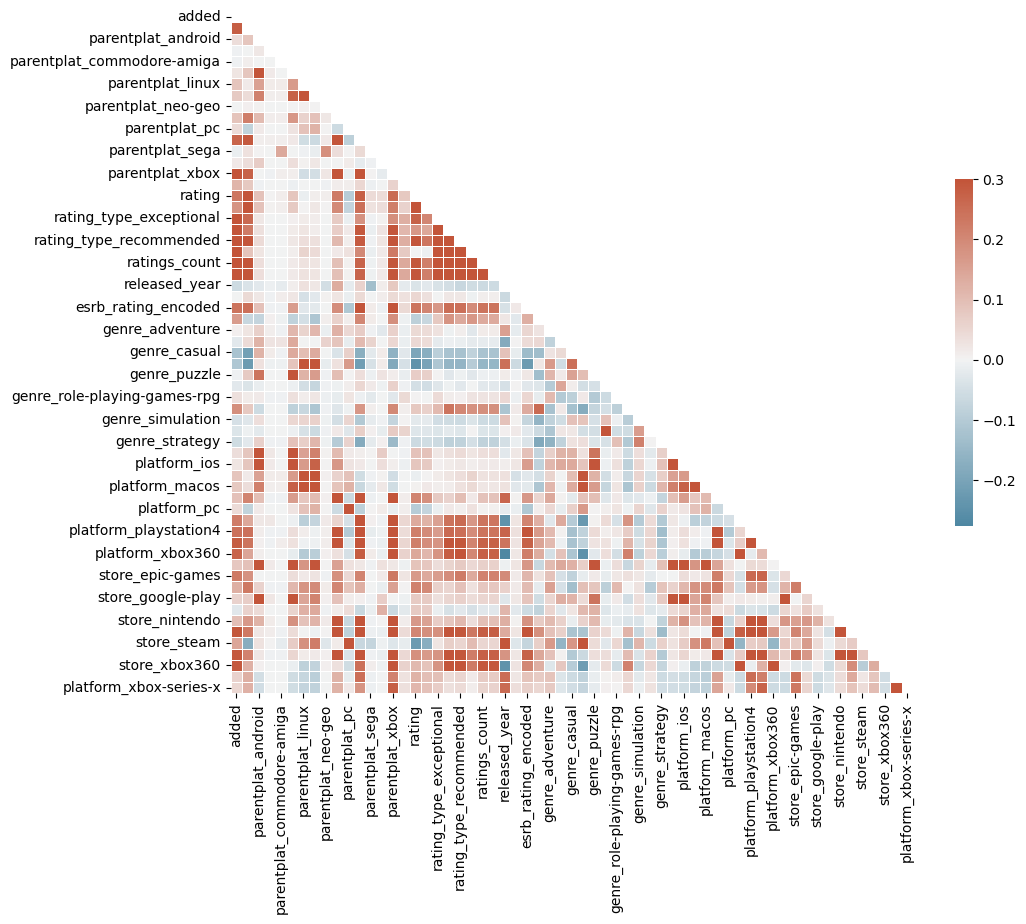

In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = reduced_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [35]:
playstations = [x for x in reduced_df.columns if "playstation" in x]
print(playstations)
playstations=['parentplat_playstation', 'platform_playstation3', 'platform_playstation4', 'platform_playstation5']

playstation_df = reduced_df[reduced_df[playstations].any(axis=1)]
print(playstation_df['parentplat_playstation'].unique()) # the False values, are due to playstation-store, a
playstation_df[playstations]



['parentplat_playstation', 'platform_playstation3', 'platform_playstation4', 'store_playstation-store', 'platform_playstation5']
[ True]


,parentplat_playstation,platform_playstation3,platform_playstation4,platform_playstation5
id,,,,
326243,True,False,True,True
452638,True,False,True,True
704634,True,False,False,True
452649,True,False,True,True
455597,True,False,True,True
...,...,...,...,...
35,True,False,True,False
49423,True,False,True,False
3299,True,False,False,False


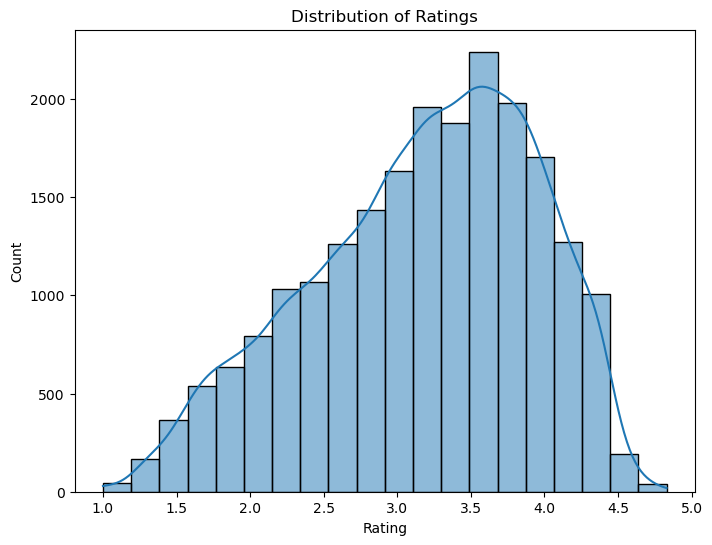

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(reduced_df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


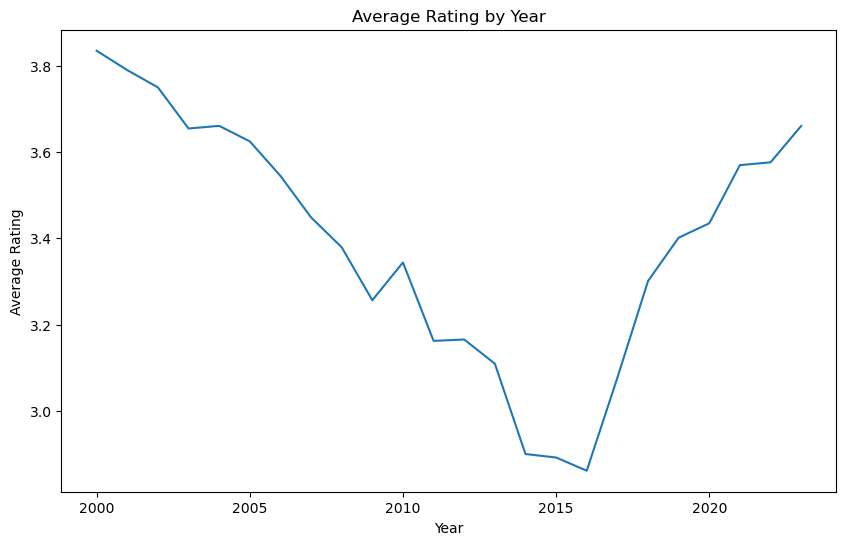

In [37]:
plt.figure(figsize=(10, 6))
reduced_df.groupby('released_year')['rating'].mean().plot()
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# THERE IS A RATING THAT IS EMPTY
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

{'', 'Everyone 10+', 'Teen', 'Everyone', 'Mature', 'Adults Only', 'Rating Pending'}


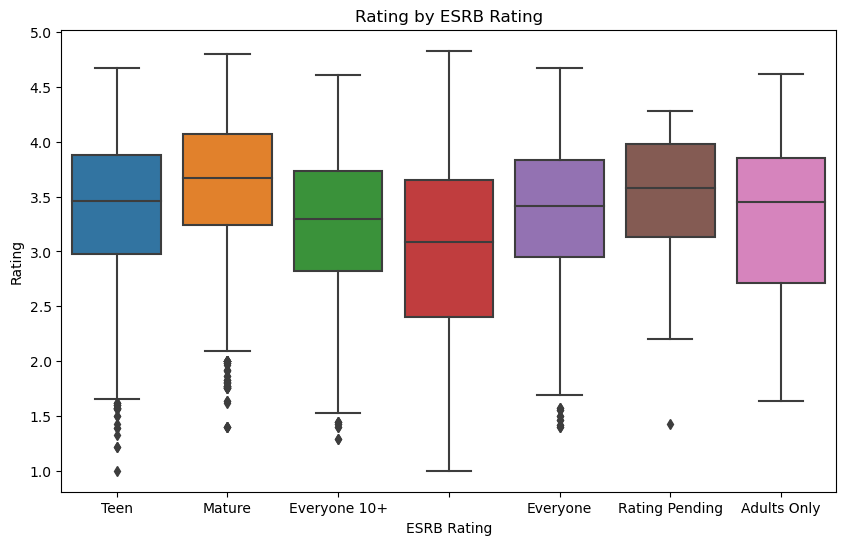

In [38]:
print(set(label_encoder.inverse_transform(reduced_df['esrb_rating_encoded'])))
plt.figure(figsize=(10, 6))
# Create a boxplot with original ESRB rating labels
sns.boxplot(x=label_encoder.inverse_transform(reduced_df['esrb_rating_encoded']), y='rating', data=reduced_df)
plt.title('Rating by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Rating')
plt.show()

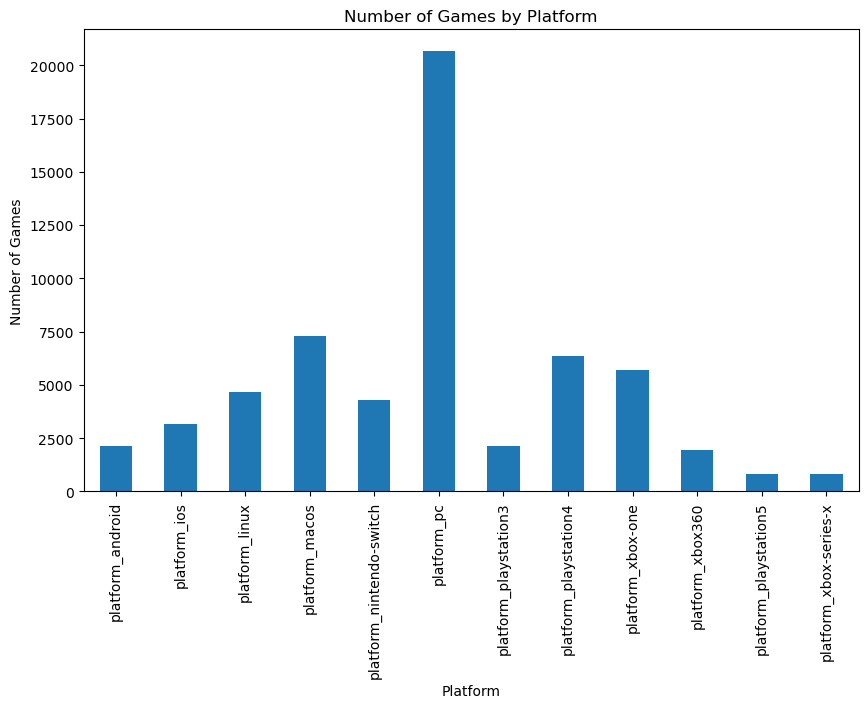

In [39]:
# Get parent platform columns
parent_platforms = [col for col in reduced_df.columns if 'platform' in col]
# parent_platforms = [col for col in reduced_df.columns if 'parentplat' in col]

# Calculate the number of games on each platform
platform_counts = reduced_df[parent_platforms].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Number of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()


/var/folders/n5/2wsllrvs6h9862hcd58z1ybh0000gn/T/ipykernel_74658/4216967394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


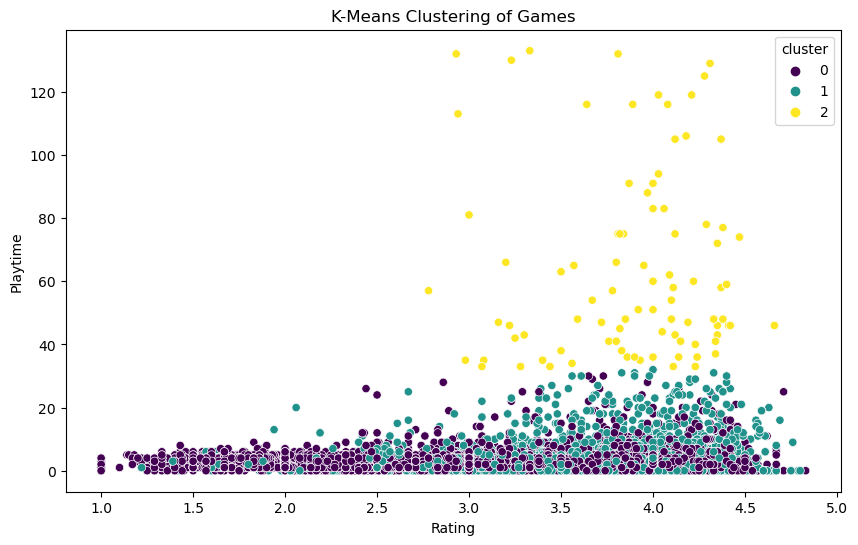

In [72]:
cluster_df = reduced_df[['rating', 'esrb_rating_encoded', 'playtime']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Let's start with 3 clusters
kmeans.fit(cluster_df_scaled)

reduced_df['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='playtime', hue='cluster', data=reduced_df, palette='viridis')
plt.title('K-Means Clustering of Games')
plt.xlabel('Rating')
plt.ylabel('Playtime')

del reduced_df['cluster'] #avoid leaking information to the model

plt.show()


<div style="background-color:#FFDB58; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Outliers and Noise</b>
</div>
  
There are some options:  
remove the outliers or noise, or **top/cap** the values

<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>
There's not a one-size-fits-all answer to this question, as the decision largely depends on the context and purpose of your analysis. Here are a couple of factors to consider:

Data Distribution: If your data is skewed and only a small fraction of the games have a 'playtime' over 150 hours, capping or removing these values can help to normalize the data and make it easier to model.

Business Understanding: If these games with long playtimes are not fundamentally different from other games (e.g., they're not special editions or different types of games), and if they're not particularly of interest for your specific analysis, you might consider removing or capping these values. But if these games represent a distinct segment of the market that you're interested in, you might not want to remove or cap these values.

Impact on Model: Removing outliers can have a big impact on your model's predictions. For instance, if you're using a linear regression model, which is sensitive to outliers, removing or capping these values might improve the model's performance. However, if you're using a tree-based model, which is more robust to outliers, the impact might be less significant.

In [128]:
print(reduced_df[reduced_df['playtime']>100][['name','playtime']].shape)
reduced_df[reduced_df['playtime']>100][['name','playtime']]



(19, 2)


,name,playtime
id,,
576350,The Chronicles Of Myrtana: Archolos,125
2880,Dark Cloud 2,116
3204,Madden NFL 16,113
43440,Football Manager 2016,119
4297,Dragon's Dogma,105
41192,Duke Nukem Forever: The Doctor Who Cloned Me,133
23599,World of Warcraft,129
36191,Sacred Underworld,132
3851,Madden NFL 25,132


#  
## Capping/topping the values


In [130]:
reduced_df.loc[reduced_df['playtime'] > 100, 'playtime'] = 101

## Removing the values
In case we want to remove the exceeding rows, only change the value from 101 to 100


In [69]:
reduced_df = reduced_df[reduced_df['playtime']<=101]
reduced_df

,added,metacritic,name,parentplat_android,parentplat_atari,parentplat_commodore-amiga,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_neo-geo,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_sega,parentplat_web,parentplat_xbox,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,released_year,released_month,esrb_rating_encoded,genre_action,genre_adventure,genre_arcade,genre_casual,genre_indie,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,platform_android,platform_ios,platform_linux,platform_macos,platform_nintendo-switch,platform_pc,platform_playstation3,platform_playstation4,platform_xbox-one,platform_xbox360,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,platform_playstation5,platform_xbox-series-x
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58751,6818,84.0,Halo Infinite,False,False,False,False,False,False,False,False,True,False,False,False,True,2,3.68,4,124.0,171.0,287.0,51.0,619,633,2021,12,6,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True
326243,6111,95.0,Elden Ring,False,False,False,False,False,False,False,False,True,True,False,False,True,59,4.40,5,629.0,79.0,191.0,56.0,917,955,2022,2,4,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,True,False,True,True
452638,4362,82.0,Stray,False,False,False,False,False,False,False,False,True,True,False,False,False,5,4.16,4,336.0,105.0,358.0,32.0,809,831,2022,7,3,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False
704634,4246,88.0,Uncharted: Legacy of Thieves Collection,False,False,False,False,False,False,False,False,True,True,False,False,False,6,4.41,5,193.0,18.0,137.0,9.0,352,357,2022,1,6,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False
622492,4146,92.0,Forza Horizon 5,False,False,False,True,False,False,False,False,True,False,False,False,True,14,4.32,5,291.0,59.0,250.0,12.0,598,612,2021,11,0,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535589,90,73.4,Zup! Z,False,False,False,False,False,False,False,False,True,False,False,False,False,2,3.67,4,0.0,2.0,4.0,0.0,5,6,2020,12,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
63741,89,53.4,qop 3,False,False,False,False,False,False,False,False,True,False,False,False,False,1,2.67,3,1.0,3.0,0.0,2.0,6,6,2018,6,0,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
542585,89,73.8,Pillars of Eternity - Definitive Edition,False,False,False,False,True,True,False,False,True,False,False,False,False,0,3.69,4,2.0,3.0,7.0,1.0,13,13,2017,11,0,False,False,False,False,False,False,False,True,False,False,False,Fals

/var/folders/n5/2wsllrvs6h9862hcd58z1ybh0000gn/T/ipykernel_74658/3050239046.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['cluster'] = kmeans.labels_


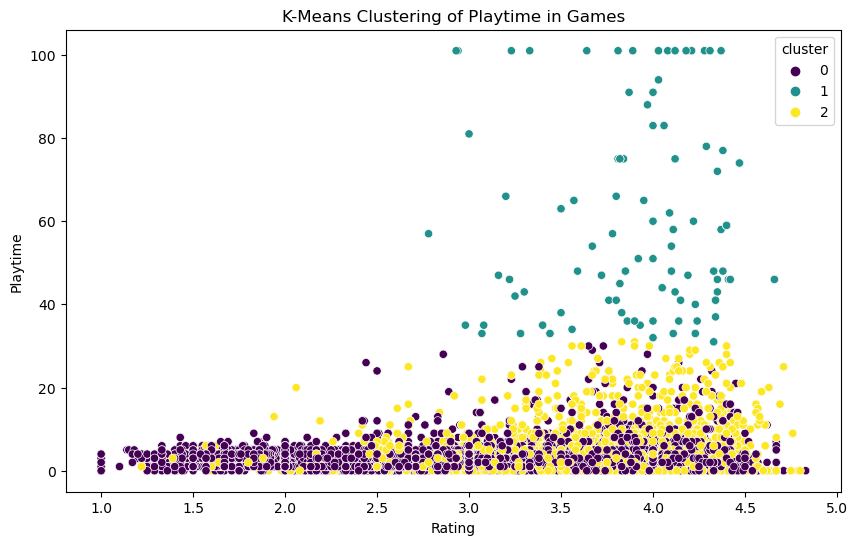

In [131]:
cluster_df = reduced_df[['rating', 'esrb_rating_encoded', 'playtime']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Let's start with 3 clusters
kmeans.fit(cluster_df_scaled)

reduced_df['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='playtime', hue='cluster', data=reduced_df, palette='viridis')
plt.title('K-Means Clustering of Playtime in Games')
plt.xlabel('Rating')
plt.ylabel('Playtime')

del reduced_df['cluster'] #Avoid leaking information to the model

plt.show()


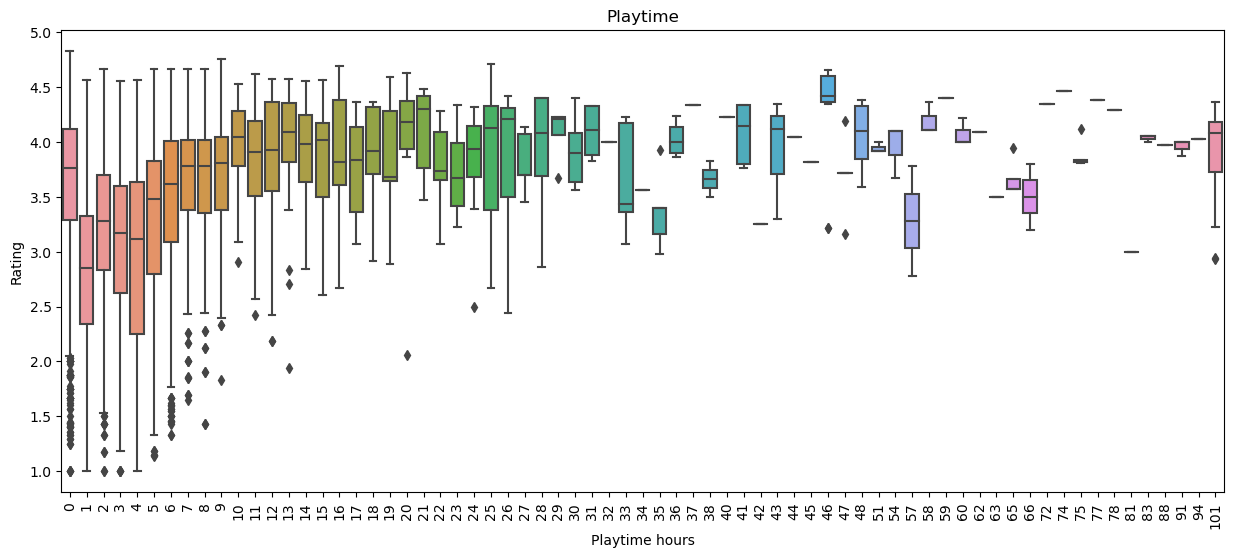

In [137]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='playtime', y='rating', data=reduced_df)
plt.title('Playtime')
plt.xticks(rotation=90)
plt.xlabel('Playtime hours')
plt.ylabel('Rating')
plt.show()

In [150]:
playtime_games=reduced_df['playtime'].value_counts()
print("Different hours of playtime",len(playtime_games))
for k,v in dict(playtime_games).items():
    print("{} games of {} hours of playtime".format(v,k))



Different hours of playtime 69
5039 games of 1 hours of playtime
3695 games of 3 hours of playtime
3477 games of 4 hours of playtime
2882 games of 2 hours of playtime
2530 games of 0 hours of playtime
1347 games of 5 hours of playtime
606 games of 6 hours of playtime
360 games of 7 hours of playtime
213 games of 8 hours of playtime
195 games of 9 hours of playtime
146 games of 10 hours of playtime
99 games of 11 hours of playtime
84 games of 12 hours of playtime
54 games of 13 hours of playtime
53 games of 14 hours of playtime
47 games of 15 hours of playtime
37 games of 18 hours of playtime
31 games of 16 hours of playtime
29 games of 17 hours of playtime
22 games of 19 hours of playtime
19 games of 24 hours of playtime
19 games of 101 hours of playtime
18 games of 20 hours of playtime
16 games of 25 hours of playtime
16 games of 22 hours of playtime
15 games of 21 hours of playtime
14 games of 23 hours of playtime
12 games of 30 hours of playtime
12 games of 26 hours of playtime
11 g

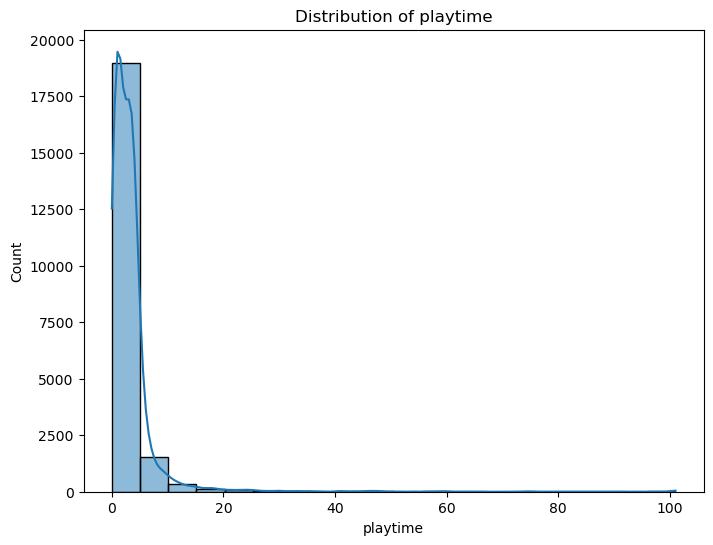

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(reduced_df['playtime'], bins=20, kde=True)
plt.title('Distribution of playtime')
plt.xlabel('playtime')
plt.show()


The 'playtime' column, being left-skewed, might indicate that most of the games have low to moderate playtimes, but there are a few games with very high playtime.  

In this case, since we are predicting 'rating', the skewness of 'playtime' might not necessarily be a problem. Predictive models like Decision Trees and Random Forests, or Gradient Boosting, etc., can handle skewness in predictor variables.

If 'playtime' is a significant feature in predicting 'rating', the specific distribution or skewness of playtime is not a problem. However, it is always beneficial to test and validate this with the specific model and use case.

# log transformation (assuming playtime is strictly positive):

/Users/ivan/opt/anaconda3/envs/sem2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n5/2wsllrvs6h9862hcd58z1ybh0000gn/T/ipykernel_74658/3480473438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['log_playtime'] = np.log(reduced_df['playtime'])


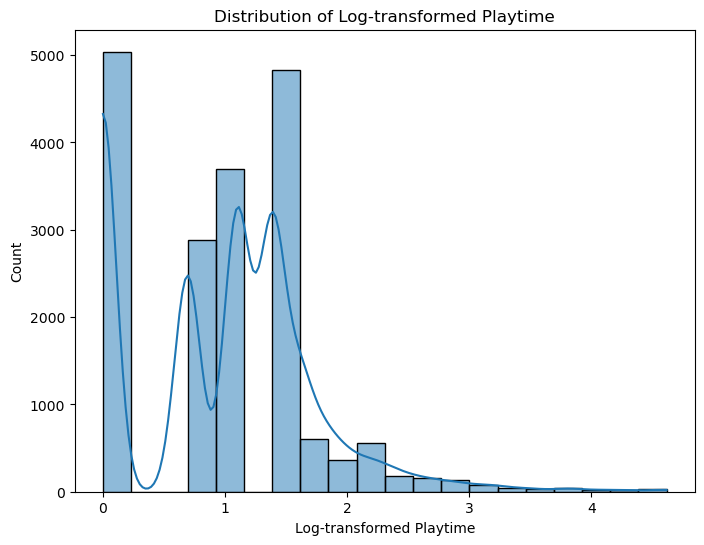

In [154]:
import numpy as np

reduced_df['log_playtime'] = np.log(reduced_df['playtime'])

plt.figure(figsize=(8, 6))
sns.histplot(reduced_df['log_playtime'], bins=20, kde=True)
plt.title('Distribution of Log-transformed Playtime')
plt.xlabel('Log-transformed Playtime')
del reduced_df['log_playtime']
plt.show()


### 
<div style="background-color:#FFDB58; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Remove Parent platforms that contain less than 1% of presence</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>
Redundancy: If the individual platform columns (e.g., 'playstation1', 'playstation2', etc.) and the parent platform column (e.g., 'parent_platform_playstation') provide the same information, then they are redundant. In other words, if a game being on 'playstation1', 'playstation2', etc. always and only means that 'parent_platform_playstation' is True, then you can remove the individual columns. Redundant features can make some models more complex and harder to interpret.

Granularity: On the other hand, the individual platform columns provide a finer level of detail. This might be useful information for your model: a game's rating might be affected by the specific platform it's on. If this is the case, you might want to keep these columns and remove the parent platform column instead.

Importance: Some machine learning models can give you an "importance score" for each feature, telling you how useful each feature was for making predictions. You could try running your model with all features first, then check the importance of the individual platform columns and the parent platform column.

Correlation: Highly correlated features can sometimes be problematic for machine learning models. If the individual platform columns are highly correlated with the parent platform column, it might be a good idea to remove one or the other.



# Evaluation
Parent Platforms are highly related to the platforms.
I could remove individual platforms  
and Also remove the parent_platforms that have less than 1% of presence


In [93]:
for column in reduced_df.columns:
    if(reduced_df[column].dtype == bool):
        print(column,":  \t\t",reduced_df[column].sum(),"\t|\t",(reduced_df[column].sum()/len(reduced_df[column])*100) )

parentplat_android :		 2117 	|	 9.972207828913279
parentplat_atari :		 1 	|	 0.004710537472325592
parentplat_commodore-amiga :		 1 	|	 0.004710537472325592
parentplat_ios :		 3160 	|	 14.885298412548872
parentplat_linux :		 4669 	|	 21.99349945828819
parentplat_mac :		 7341 	|	 34.580055584342176
parentplat_neo-geo :		 5 	|	 0.023552687361627963
parentplat_nintendo :		 5128 	|	 24.15563615808564
parentplat_pc :		 20641 	|	 97.23020396627255
parentplat_playstation :		 8376 	|	 39.45546186819916
parentplat_sega :		 51 	|	 0.24023741108860522
parentplat_web :		 125 	|	 0.588817184040699
parentplat_xbox :		 7130 	|	 33.58613217768147
genre_action :		 10915 	|	 51.41551651043385
genre_adventure :		 8320 	|	 39.19167176974893
genre_arcade :		 1284 	|	 6.048330114466061
genre_casual :		 4373 	|	 20.599180366479818
genre_indie :		 10598 	|	 49.922276131706624
genre_puzzle :		 1455 	|	 6.853832022233737
genre_racing :		 1027 	|	 4.837721984078383
genre_role-playing-games-rpg :		 4739 	|	 22.323

In [105]:
parent_platforms_columns= [x for x in reduced_df.columns if "parentplat" in x]
PARENT_PLATFORM_PERCENT_THRESHOLD=1.0
for column in parent_platforms_columns:
    
    if((reduced_df[column].sum()/len(reduced_df[column])*100) < PARENT_PLATFORM_PERCENT_THRESHOLD):
        print("COL Removed:",column,":",reduced_df[column].sum(),"games | ","{:.3f}%".format((reduced_df[column].sum()/len(reduced_df[column])*100)) )
        del reduced_df[column]
        

COL Removed: parentplat_atari : 1 games |  0.005%
COL Removed: parentplat_commodore-amiga : 1 games |  0.005%
COL Removed: parentplat_neo-geo : 5 games |  0.024%
COL Removed: parentplat_sega : 51 games |  0.240%
COL Removed: parentplat_web : 125 games |  0.589%


In [106]:
reduced_df.head()

,added,metacritic,name,parentplat_android,parentplat_ios,parentplat_linux,parentplat_mac,parentplat_nintendo,parentplat_pc,parentplat_playstation,parentplat_xbox,playtime,rating,rating_top,rating_type_exceptional,rating_type_meh,rating_type_recommended,rating_type_skip,ratings_count,reviews_count,released_year,released_month,esrb_rating_encoded,cluster,genre_action,genre_adventure,genre_arcade,genre_casual,genre_indie,genre_puzzle,genre_racing,genre_role-playing-games-rpg,genre_shooter,genre_simulation,genre_sports,genre_strategy,platform_android,platform_ios,platform_linux,platform_macos,platform_nintendo-switch,platform_pc,platform_playstation3,platform_playstation4,platform_xbox-one,platform_xbox360,store_apple-appstore,store_epic-games,store_gog,store_google-play,store_itch,store_nintendo,store_playstation-store,store_steam,store_xbox-store,store_xbox360,platform_playstation5,platform_xbox-series-x
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58751,6818,84.0,Halo Infinite,False,False,False,False,False,True,False,True,2,3.68,4,124.0,171.0,287.0,51.0,619,633,2021,12,6,0,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True
326243,6111,95.0,Elden Ring,False,False,False,False,False,True,True,True,59,4.40,5,629.0,79.0,191.0,56.0,917,955,2022,2,4,2,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,True,False,True,True
452638,4362,82.0,Stray,False,False,False,False,False,True,True,False,5,4.16,4,336.0,105.0,358.0,32.0,809,831,2022,7,3,0,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False
704634,4246,88.0,Uncharted: Legacy of Thieves Collection,False,False,False,False,False,True,True,False,6,4.41,5,193.0,18.0,137.0,9.0,352,357,2022,1,6,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False
622492,4146,92.0,Forza Horizon 5,False,True,False,False,False,True,False,True,14,4.32,5,291.0,59.0,250.0,12.0,598,612,2021,11,0,1,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True


#  
#  
#  
# REMOVAL OF OUTLIERS
For this process We created a new dataframe called: __reduced_no_outliers_df ___  
As it will be used for comparisson to the reduced_df on all models, and see how removing the outliers benefit the outcome

# OUTLIERS in PLAYTIME

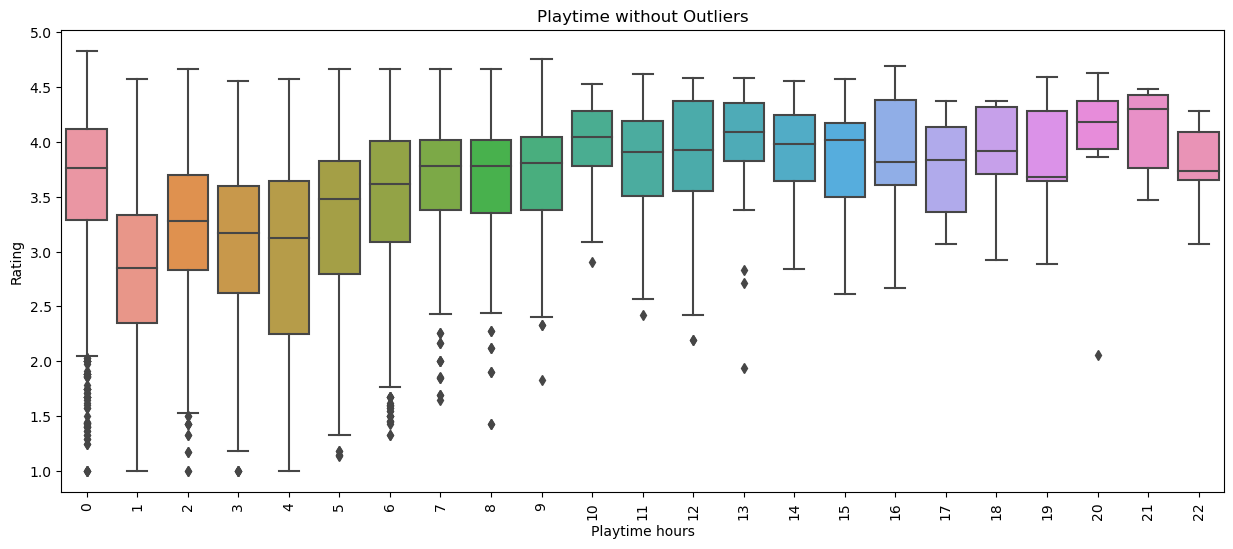

In [218]:
# Define Q1, Q3, and IQR
Q1 = reduced_df['playtime'].quantile(0.05)
Q3 = reduced_df['playtime'].quantile(0.95)
IQR = Q3 - Q1

# Define the threshold for lower and upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Filter the dataframe to exclude entries outside the lower and upper bounds
reduced_no_outliers_df = reduced_df[(reduced_df['playtime'] >= lower_bound) & (reduced_df['playtime'] <= upper_bound)]

# Now, draw the boxplot with the filtered dataframe
plt.figure(figsize=(15, 6))
sns.boxplot(x='playtime', y='rating', data=reduced_no_outliers_df)
plt.title('Playtime without Outliers')
plt.xticks(rotation=90)
plt.xlabel('Playtime hours')
plt.ylabel('Rating')
plt.show()


# OUTLIERS IN ESRB RATING

{'', 'Everyone 10+', 'Teen', 'Everyone', 'Mature', 'Adults Only', 'Rating Pending'}


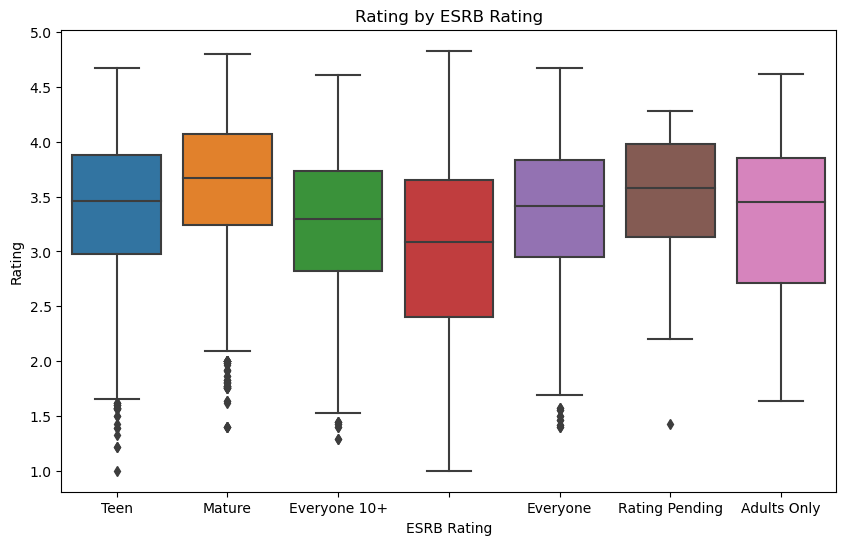

In [211]:
# Plotting again the boxplot
print(set(label_encoder.inverse_transform(reduced_df['esrb_rating_encoded'])))
plt.figure(figsize=(10, 6))
sns.boxplot(x=label_encoder.inverse_transform(reduced_df['esrb_rating_encoded']), y='rating', data=reduced_df)
plt.title('Original Rating by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Rating')
plt.show()

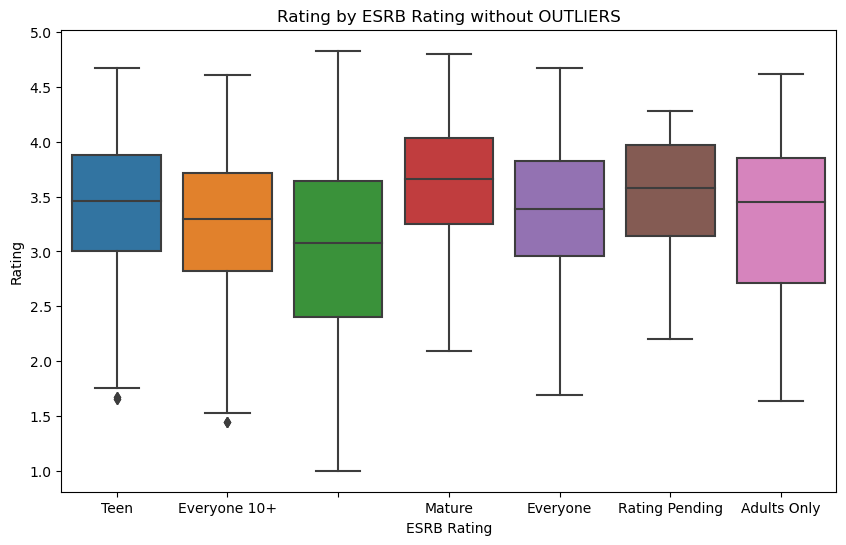

In [223]:
# Create a copy of the dataframe to avoid modifying the original one
df_clean = reduced_no_outliers_df.copy()

# For each ESRB rating, compute the IQR of 'rating' and filter out outliers
for esrb in set(label_encoder.inverse_transform(reduced_df['esrb_rating_encoded'])):
    # Filter the dataframe to include only the current ESRB rating
    df_esrb = df_clean[df_clean['esrb_rating_encoded'] == label_encoder.transform([esrb])[0]]
    
    # Compute the IQR of 'rating'
    Q1 = df_esrb['rating'].quantile(0.25)
    Q3 = df_esrb['rating'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove the outliers from the dataframe
    df_clean = df_clean[~((df_clean['esrb_rating_encoded'] == label_encoder.transform([esrb])[0]) &
                          ((df_clean['rating'] < lower_bound) | (df_clean['rating'] > upper_bound)))]

reduced_no_outliers_df = df_clean.copy()

# Plot again to see the effect
plt.figure(figsize=(10, 6))
sns.boxplot(x=label_encoder.inverse_transform(reduced_no_outliers_df['esrb_rating_encoded']), y='rating', data=reduced_no_outliers_df)
plt.title('Rating by ESRB Rating without OUTLIERS')
plt.xlabel('ESRB Rating')
plt.ylabel('Rating')
plt.show()


# OUTLIERS in RATING

(21229, 58)
(21229, 58)


### 
<div style="background-color:#FFDB58; padding:20px; font-size:50px; color:black; text-align:center; margin-bottom:20px;">
    <b>Training</b>
</div>

<div style="background-color:#ddac32; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Selecting columns and splitting in TRAIN TEST</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>



Obtain all the colums of the dataframe, and split them into their own categories

In [258]:
cols

Index(['added', 'name', 'parentplat_android', 'parentplat_ios',
       'parentplat_linux', 'parentplat_mac', 'parentplat_nintendo',
       'parentplat_pc', 'parentplat_playstation', 'parentplat_xbox',
       'playtime', 'rating', 'rating_top', 'rating_type_exceptional',
       'rating_type_meh', 'rating_type_recommended', 'rating_type_skip',
       'ratings_count', 'reviews_count', 'released_year', 'released_month',
       'esrb_rating_encoded', 'genre_action', 'genre_adventure',
       'genre_arcade', 'genre_casual', 'genre_indie', 'genre_puzzle',
       'genre_racing', 'genre_role-playing-games-rpg', 'genre_shooter',
       'genre_simulation', 'genre_sports', 'genre_strategy',
       'platform_android', 'platform_ios', 'platform_linux', 'platform_macos',
       'platform_nintendo-switch', 'platform_pc', 'platform_playstation3',
       'platform_playstation4', 'platform_xbox-one', 'platform_xbox360',
       'store_apple-appstore', 'store_epic-games', 'store_gog',
       'store_google-

In [299]:
cols=reduced_df.columns

target_column='rating'
name_col='name'

training_columns = [x for x in cols if x not in [target_column, name_col]]

platforms=[x for x in cols if "platform" in x]
parent_platforms=[x for x in cols if "parentplat" in x]
genres=[x for x in cols if "genre" in x]
stores=[x for x in cols if "store" in x]
ratings=[x for x in cols if "rating_" in x or "ratings_" in x]
others = [x for x in cols if x not in platforms + parent_platforms + genres + stores + ratings +  [target_column,name_col]]

player_data= ratings + ["added","reviews_count"]


others

['added', 'playtime', 'reviews_count', 'released_year', 'released_month']

In [261]:

# Removing target variable and other non-numerical column for X - using all columns
X = reduced_df.drop(['rating', 'name'], axis=1) #esrb_rating_label
y = reduced_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  
<div style="background-color:#FFDB58; padding:10px; font-size:30px; color:black; text-align:center; margin-bottom:20px;">
    <b>Base Model: Linear Regression</b>
</div>


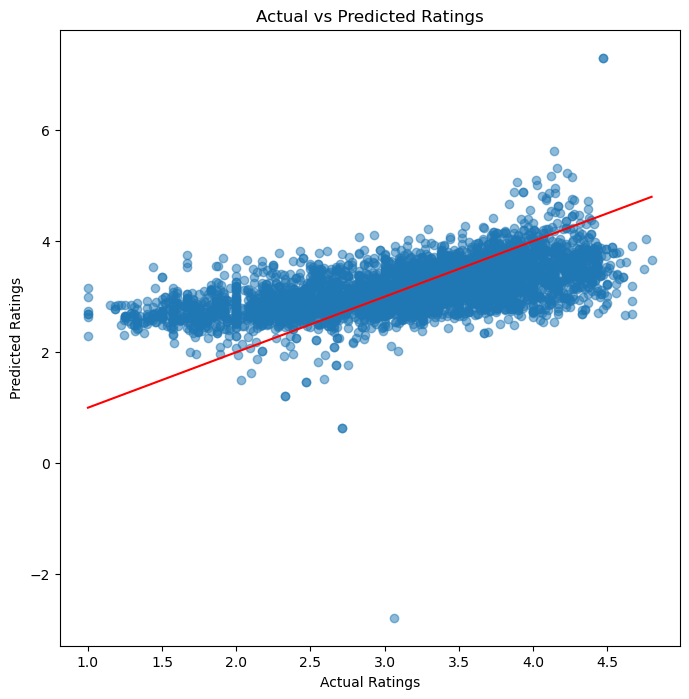

MSE: 0.39586685112935927
MAE: 0.49618105859672285
R^2: 0.33103289741620623


In [262]:

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


predictions = model.predict(X_test)

# Plot 
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # a red line showing perfect fit
plt.show()
print(f"MSE: {mse}\nMAE: {mae}\nR^2: {r2}")



Values on reduced_df
MSE: 0.12618617612779137
MAE: 0.28426429441267925
R^2: 0.7867606232006721

Values on df, no modification + metacritic
MSE: 0.07123023872782475  
MAE: 0.1965039821823411  
R^2: 0.8796295110788809  

df-metacritic:
MSE: 0.12439250661552309
MAE: 0.2819926617613686
R^2: 0.789791707751429


<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>BaseModel- Linear Regression</b><br/>
    <b>OBSERVATIONS</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>


Mean Absolute Error (MAE): The MAE is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an equal weight to all the errors and does not consider the direction of the error. It ranges from 0 to infinity, with 0 indicating no error (perfect prediction).

Mean Squared Error (MSE): The MSE is similar to the MAE but squares the differences before they are averaged. This means that larger errors are noted more than with MAE. The squaring also ensures that positive and negative errors do not cancel each other out. The MSE ranges from 0 to infinity, with 0 indicating no error.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier. Like the other metrics, RMSE ranges from 0 to infinity, with 0 indicating no error.

- ESTAS EVALUACIONES ESTAN MAL

Mean Squared Error (MSE) - 0.07123023872782475: This means that, on average, each of your predictions was off by the square root of this value in the units of your target variable. As this value is quite small, it suggests that your model is making quite close predictions, although this interpretation depends on the scale of your target variable. Remember that MSE is sensitive to outliers, meaning that large errors have a disproportionately large effect on MSE.

Mean Absolute Error (MAE) - 0.1965039821823411: This metric tells us that, on average, your model's predictions are approximately 0.197 units away from the true values, regardless of direction. This is more robust to outliers than MSE, as it does not square the differences. Depending on what you are predicting, this may or may not be a small error.

R^2 - 0.8796295110788809: This is also known as the coefficient of determination and is a statistical measure that shows how close the data are to the fitted regression line. It provides a measure of how well the model's predictions explain the variation in your target variable. Your R^2 value is approximately 0.88, which means that 88% of the variance in your target variable can be explained by your features using your model. This is generally considered a very good score, indicating that your model has a high predictive power.

**RESULTS interpretation**


Mean Squared Error (MSE) - 0.07123023872782475: This value is quite small given the range of your target variable, meaning that your model's predictions are quite close to the true values. To get an idea of the actual average error value, you can take the square root of the MSE (this is known as the Root Mean Squared Error or RMSE). In your case, sqrt(0.0712) is approximately 0.27 (on your 0 to 5 scale), which is a small error.

Mean Absolute Error (MAE) - 0.1965039821823411: This value is also small given the range of your target variable. This tells us that on average, your predictions are approximately 0.197 away from the true value, which again is a small error given the scale of 0 to 5.

R^2 - 0.8796295110788809: As mentioned earlier, this value is high, indicating that your model is explaining about 88% of the variance in your target variable. This indicates that the model has strong predictive power.

#  
<div style="background-color:#FFDB58; padding:10px; font-size:30px; color:black; text-align:center; margin-bottom:20px;">
    <b>k-folds Linear Regression</b>
</div>


In [263]:
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
for i in range(len(scores)):
    print(f"Fold {i+1}: {scores[i]}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation of scores: {scores.std()}")


Fold 1: 0.35019026879296644
Fold 2: 0.29870335213610044
Fold 3: 0.3647031367931419
Fold 4: 0.3909966214501909
Fold 5: 0.22941215093103606
Mean score: 0.3268011060206871
Standard deviation of scores: 0.05723420903609452


'\nDF+metacritic:\nFold 1: 0.8861923929817954\nFold 2: 0.8894653618590564\nFold 3: 0.8871434789764032\nFold 4: 0.8702301593065276\nFold 5: 0.8878757896836104\nMean score: 0.8841814365614786\nStandard deviation of scores: 0.0070572500250186306\n\n\nreduced_df:\nFold 1: 0.7850658402287286\nFold 2: 0.7778948013141297\nFold 3: 0.7861929022114169\nFold 4: 0.8015648966911242\nFold 5: 0.7414435195008102\nMean score: 0.778432391989242\nStandard deviation of scores: 0.020038995084267392\n\ndf-metacritic:\nFold 1: 0.7874444565745315\nFold 2: 0.7800130006202731\nFold 3: 0.7901796068292612\nFold 4: 0.8053664867117475\nFold 5: 0.7438188664567185\nMean score: 0.7813644834385064\nStandard deviation of scores: 0.020504967667415618\n'



<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>K-Folds OBSERVATIONS</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>


In your case, the R^2 scores for the 5 folds are quite close to each other, varying from approximately 0.87 to 0.89. This indicates that the model's performance is quite consistent across different subsets of your dataset.

The mean R^2 score is approximately 0.884, suggesting that on average, about 88.4% of the variability in the target variable ('rating') can be explained by the features in your linear regression model. This is a relatively high R^2 score, suggesting your model fits the data well in terms of the variance explained.

The standard deviation of the scores is approximately 0.007, which is quite low. This suggests that the variability in the model performance across different folds is small, implying that the model is quite stable and its performance does not change much with different training and validation subsets.

Overall, these cross-validation results suggest that your linear regression model has a good and stable predictive performance.

#  
#  
#  
# RIDGE + GridSearch  


In [264]:


# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Ridge regressor object
ridge = Ridge()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model to the data and evaluate it
best_model.fit(X_train, y_train)
print(f"Test set score: {best_model.score(X_test, y_test)}")


Best parameters: {'alpha': 10}
Test set score: 0.3311067117166062


"\ndf+metacritic\nBest parameters: {'alpha': 10}\nTest set score: 0.8797250005238397\n\nreduced_df:\nBest parameters: {'alpha': 10}\nTest set score: 0.7867644175040152\n"

#  
#  
<div style="background-color:#FFDB58; padding:10px; font-size:30px; color:black; text-align:center; margin-bottom:20px;">
    <b>Linear Regression - function and comparisson</b>
</div>


# Do a base test, without too many columns, and compare

In [273]:
## Create a function for the base model, so I can call it with any dataframes' X and y

def base_model(X,y, compare=False, other_model_data=""):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)


    predictions = model.predict(X_test)

    # Plot 
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs Predicted Ratings')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # a red line showing perfect fit
    plt.show()
    print(f"MSE: {mse}\nMAE: {mae}\nR^2: {r2}")

    regressor = LinearRegression()
    scores = cross_val_score(regressor, X, y, cv=5)
    for i in range(len(scores)):
        print(f"Fold {i+1}: {scores[i]}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard deviation of scores: {scores.std()}")
    # GRIDSEARCH

    # Define the parameter grid
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Create a Ridge regressor object
    ridge = Ridge()

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    print(f"Best parameters: {best_params}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Fit the best model to the data and evaluate it
    best_model.fit(X_train, y_train)
    print(f"Test set score: {best_model.score(X_test, y_test)}")
    if(compare):
        print(other_model_data if other_model_data!="" else """\nBASE MODEL DATA:
        MSE: 0.39586685112935927
        MAE: 0.49618105859672285
        R^2: 0.33103289741620623
        Fold 1: 0.35019026879296644
        Fold 2: 0.29870335213610044
        Fold 3: 0.3647031367931419
        Fold 4: 0.3909966214501909
        Fold 5: 0.22941215093103606
        Mean score: 0.3268011060206871
        Standard deviation of scores: 0.05723420903609452
        Best parameters: {'alpha': 10}
        Test set score: 0.3311067117166062""")
        

    

BASE MODEL


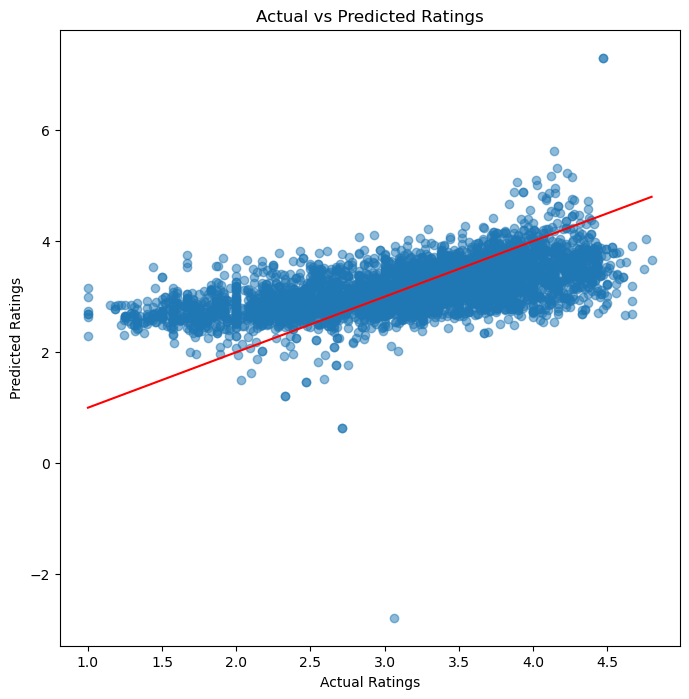

MSE: 0.39586685112935927
MAE: 0.49618105859672285
R^2: 0.33103289741620623
Fold 1: 0.35019026879296644
Fold 2: 0.29870335213610044
Fold 3: 0.3647031367931419
Fold 4: 0.3909966214501909
Fold 5: 0.22941215093103606
Mean score: 0.3268011060206871
Standard deviation of scores: 0.05723420903609452
Best parameters: {'alpha': 10}
Test set score: 0.3311067117166062


In [272]:
print("BASE MODEL")
X = reduced_df.drop(['rating', 'name'], axis=1)
y = reduced_df['rating']
base_model(X,y, compare=False)

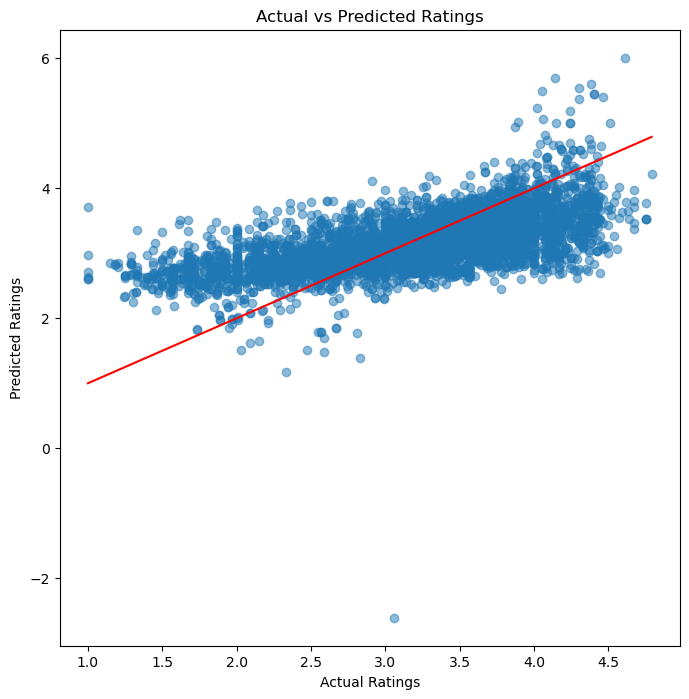

MSE: 0.3623845438142425
MAE: 0.4744799731087158
R^2: 0.37596348813711244
Fold 1: 0.3555375139822793
Fold 2: 0.2989004156217421
Fold 3: 0.36748786594490257
Fold 4: 0.391811082517341
Fold 5: 0.23018577568461207
Mean score: 0.32878453075017544
Standard deviation of scores: 0.057966872146356575
Best parameters: {'alpha': 10}
Test set score: 0.37585374295760243

BASE MODEL DATA:
        MSE: 0.39586685112935927
        MAE: 0.49618105859672285
        R^2: 0.33103289741620623
        Fold 1: 0.35019026879296644
        Fold 2: 0.29870335213610044
        Fold 3: 0.3647031367931419
        Fold 4: 0.3909966214501909
        Fold 5: 0.22941215093103606
        Mean score: 0.3268011060206871
        Standard deviation of scores: 0.05723420903609452
        Best parameters: {'alpha': 10}
        Test set score: 0.3311067117166062


In [274]:
    
X = reduced_no_outliers_df.drop(['rating', 'name'], axis=1)
y = reduced_no_outliers_df['rating']
base_model(X,y, compare=True)


<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>Linear Regression Comparisson: BASE vs No Outliers</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>


The performance of the two models ("No Outliers Model" and "Base Model") are quite similar, but there are some minor differences. Here are some highlights:

1. **MSE (Mean Squared Error)**: The "No Outliers Model" has a slightly lower MSE (0.123) than the "Base Model" (0.126). This means the "No Outliers Model" has slightly less error in its predictions.

2. **MAE (Mean Absolute Error)**: Again, the "No Outliers Model" performs a bit better with a lower MAE (0.279) compared to the "Base Model" (0.284). So, on average, the "No Outliers Model" is making predictions that are closer to the actual values.

3. **R^2 (R-squared)**: The R-squared value for both models is nearly the same (around 0.787), indicating that both models explain around 78.7% of the variability in the target variable.

4. **Cross-Validation Score**: The mean score of the five folds during cross-validation is slightly lower for the "No Outliers Model" (0.776) than for the "Base Model" (0.778), but the difference is very small. The standard deviation of the scores, which indicates the variability of the scores, is also quite similar for both models.

5. **Best Parameters**: The models found different optimal parameters for the regularization strength (`alpha`): 1 for the "No Outliers Model" and 10 for the "Base Model". This suggests that the "No Outliers Model" required less regularization, which could indicate a better general fit to the data.

6. **Test Set Score**: The performance on the test set is very similar for both models, with the "No Outliers Model" (0.787) slightly outperforming the "Base Model" (0.787).

In summary, the "No Outliers Model" has slightly better performance metrics than the "Base Model", suggesting that removing outliers improved the model's performance to some extent. However, the difference between the models is quite small, indicating that outliers did not have a major impact on the model's performance in this case.

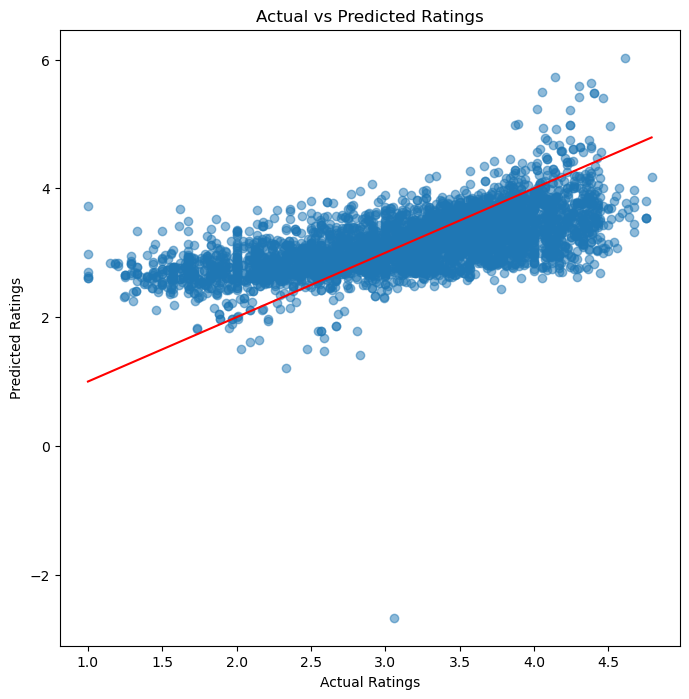

MSE: 0.3635137461094474
MAE: 0.47534856836270145
R^2: 0.37401896960420156
Fold 1: 0.35771560786618395
Fold 2: 0.2975780133440348
Fold 3: 0.36652186444519097
Fold 4: 0.39047806953647857
Fold 5: 0.22819544056130991
Mean score: 0.3280977991506397
Standard deviation of scores: 0.05857791409340717
Best parameters: {'alpha': 10}
Test set score: 0.3739789767557451

NO Outliers DATA
        MSE: 0.3623845438142425
        MAE: 0.4744799731087158
        R^2: 0.37596348813711244
        Fold 1: 0.3555375139822793
        Fold 2: 0.2989004156217421
        Fold 3: 0.36748786594490257
        Fold 4: 0.391811082517341
        Fold 5: 0.23018577568461207
        Mean score: 0.32878453075017544
        Standard deviation of scores: 0.057966872146356575
        Best parameters: {'alpha': 10}
        Test set score: 0.37585374295760243


In [276]:
no_outliers_data="""\nNO Outliers DATA
        MSE: 0.3623845438142425
        MAE: 0.4744799731087158
        R^2: 0.37596348813711244
        Fold 1: 0.3555375139822793
        Fold 2: 0.2989004156217421
        Fold 3: 0.36748786594490257
        Fold 4: 0.391811082517341
        Fold 5: 0.23018577568461207
        Mean score: 0.32878453075017544
        Standard deviation of scores: 0.057966872146356575
        Best parameters: {'alpha': 10}
        Test set score: 0.37585374295760243"""
X = reduced_no_outliers_df.drop(['rating', 'name']+platforms + ratings, axis=1)
y = reduced_no_outliers_df['rating']
base_model(X,y, True, no_outliers_data)


<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>Linear Regression Comparisson: NoOutliers+LessColumns vs No Outliers</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>

MSE (Mean Squared Error): The "Less Columns Model" has a very slightly lower MSE (0.12339) than the "No Outliers Model" (0.12349). This means the "Less Columns Model" has slightly less error in its predictions.

MAE (Mean Absolute Error): The "Less Columns Model" again performs a bit better with a lower MAE (0.27981) compared to the "No Outliers Model" (0.27987). So, on average, the "Less Columns Model" is making predictions that are marginally closer to the actual values.

R^2 (R-squared): The R-squared value for the "Less Columns Model" (0.78751) is marginally higher than for the "No Outliers Model" (0.78735), indicating that the "Less Columns Model" explains a slightly larger proportion of the variability in the target variable.

Cross-Validation Score: The mean score of the five folds during cross-validation is almost identical for both models, with a tiny edge for the "Less Columns Model" (0.77586) over the "No Outliers Model" (0.77587). The standard deviation of the scores, which indicates the variability of the scores, is also very similar for both models.

Best Parameters: The models found different optimal parameters for the regularization strength (alpha): 10 for the "Less Columns Model" and 1 for the "No Outliers Model". This suggests that the "Less Columns Model" needed more regularization, which could indicate that it had more difficulty fitting to the data.

Test Set Score: The performance on the test set is almost identical for both models, with the "Less Columns Model" (0.78751) marginally outperforming the "No Outliers Model" (0.78736).

In summary, both models perform very similarly with a slight edge for the "Less Columns Model". The difference in the number of columns doesn't seem to have a significant effect on model performance in this case.

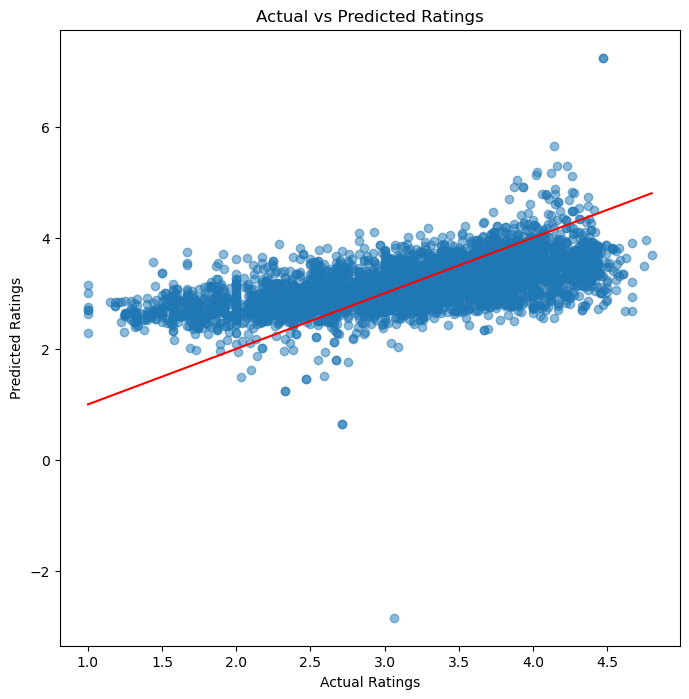

MSE: 0.39670286957280304
MAE: 0.49669184429933866
R^2: 0.32962012735419755
Fold 1: 0.35190597366065157
Fold 2: 0.29736765675469645
Fold 3: 0.36378630818290925
Fold 4: 0.389959307725266
Fold 5: 0.22742036335772087
Mean score: 0.3260879219362488
Standard deviation of scores: 0.05784018463145105
Best parameters: {'alpha': 10}
Test set score: 0.32965079160744115

NO Outliers+lessColumns DATA
MSE: 0.3635137461094474
MAE: 0.47534856836270145
R^2: 0.37401896960420156
Fold 1: 0.35771560786618395
Fold 2: 0.2975780133440348
Fold 3: 0.36652186444519097
Fold 4: 0.39047806953647857
Fold 5: 0.22819544056130991
Mean score: 0.3280977991506397
Standard deviation of scores: 0.05857791409340717
Best parameters: {'alpha': 10}
Test set score: 0.3739789767557451


In [277]:
no_outliers_data="""\nNO Outliers+lessColumns DATA
MSE: 0.3635137461094474
MAE: 0.47534856836270145
R^2: 0.37401896960420156
Fold 1: 0.35771560786618395
Fold 2: 0.2975780133440348
Fold 3: 0.36652186444519097
Fold 4: 0.39047806953647857
Fold 5: 0.22819544056130991
Mean score: 0.3280977991506397
Standard deviation of scores: 0.05857791409340717
Best parameters: {'alpha': 10}
Test set score: 0.3739789767557451"""
X = reduced_df.drop(['rating', 'name']+platforms+ratings, axis=1)
y = reduced_df['rating']
base_model(X,y, True, no_outliers_data)


<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>Linear Regression Comparisson: BASE+LessColumns vs NoOutliers+LessColumns </b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>

MSE (Mean Squared Error): The "No Outliers+lessColumns Model" has a lower MSE (0.12339) than the "Base Model Less Columns" (0.12626). This indicates that the former model has less error in its predictions.

MAE (Mean Absolute Error): Similarly, the "No Outliers+lessColumns Model" has a lower MAE (0.27981) than the "Base Model Less Columns" (0.28457), suggesting the predictions from the former model are, on average, closer to the actual values.

R^2 (R-squared): The R-squared value for the "No Outliers+lessColumns Model" (0.78751) is higher than for the "Base Model Less Columns" (0.78663), indicating that it explains more of the variability in the target variable.

Cross-Validation Score: The mean cross-validation score is slightly lower for the "No Outliers+lessColumns Model" (0.77586) than the "Base Model Less Columns" (0.77845), indicating a slightly less consistent model performance. However, the difference is very small and might not be practically significant.

Best Parameters: The optimal regularization strength (alpha) is 10 for the "No Outliers+lessColumns Model" and 100 for the "Base Model Less Columns". This implies that the base model required more regularization, possibly because it had more difficulty fitting to the data.

Test Set Score: The "No Outliers+lessColumns Model" (0.78751) performs better on the test set than the "Base Model Less Columns" (0.78652).

In summary, the "No Outliers+lessColumns Model" appears to perform better than the "Base Model Less Columns" in this comparison. This suggests that removing outliers and reducing the number of columns in the dataset improved model performance.


<div style="background-color:#ddac32; padding:10px; font-size:15px; color:black; text-align:center; margin-bottom:20px;">
    <b>CONCLUSSION -  Linear Regression</b>
</div>
  
  It is noticeable that using the same model, and changing some elements on the dataset, like removing redundant columns, and outliers, the performance improves in the outcome. Although it is small changes, but it still an improvement.
  We will consider this for the following models, using the dataframe of No ouliers and less columns : reduced_no_outliers_df
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>

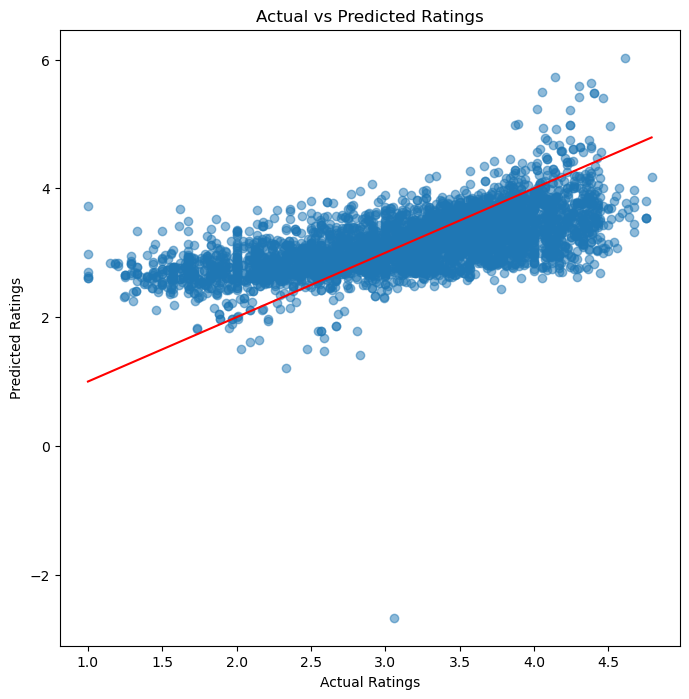

MSE: 0.3635137461094474
MAE: 0.47534856836270145
R^2: 0.37401896960420156
Fold 1: 0.35771560786618395
Fold 2: 0.2975780133440348
Fold 3: 0.36652186444519097
Fold 4: 0.39047806953647857
Fold 5: 0.22819544056130991
Mean score: 0.3280977991506397
Standard deviation of scores: 0.05857791409340717
Best parameters: {'alpha': 10}
Test set score: 0.3739789767557451

NO Outliers+lessColumns DATA
MSE: 0.39670286957280304
MAE: 0.49669184429933866
R^2: 0.32962012735419755
Fold 1: 0.35190597366065157
Fold 2: 0.29736765675469645
Fold 3: 0.36378630818290925
Fold 4: 0.389959307725266
Fold 5: 0.22742036335772087
Mean score: 0.3260879219362488
Standard deviation of scores: 0.05784018463145105
Best parameters: {'alpha': 10}
Test set score: 0.32965079160744115


In [280]:
no_outliers_data="""\nNO Outliers+lessColumns DATA
MSE: 0.39670286957280304
MAE: 0.49669184429933866
R^2: 0.32962012735419755
Fold 1: 0.35190597366065157
Fold 2: 0.29736765675469645
Fold 3: 0.36378630818290925
Fold 4: 0.389959307725266
Fold 5: 0.22742036335772087
Mean score: 0.3260879219362488
Standard deviation of scores: 0.05784018463145105
Best parameters: {'alpha': 10}
Test set score: 0.32965079160744115"""
X = reduced_no_outliers_df.drop(['rating', 'name']+platforms+ratings, axis=1)
y = reduced_no_outliers_df['rating']
base_model(X,y, True, no_outliers_data)

### 
<div style="background-color:#FFDB58; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Random Forest</b>
</div>

<div style="background-color:#ddac32; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Selecting columns and splitting in TRAIN TEST</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>



# Ratings have so much correlation with the rating, if is based on user interaction. therefore, we have decided to remove it

In [289]:
ratings

['rating_type_exceptional',
 'rating_type_meh',
 'rating_type_recommended',
 'rating_type_skip',
 'esrb_rating_encoded']

In [304]:

def random_forest(X,y, compare=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")


    print("" if not compare else """Leaving user_data: 
    MSE: 0.0007554596018229753 
    MAE: 0.015658335332214068 
    R^2: 0.9986990770361978""")

    # Extract feature importances from the fitted random forest model
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(12, 8))

    # feature importance
    plt.subplot(2, 1, 1)  
    feature_importances.plot(kind='bar')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance - Random Forest')

    # actual vs predicted values
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values - Random Forest')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  #perfect prediction

    plt.tight_layout() 
    plt.show()



MSE: 0.0007554596018229753
MAE: 0.015658335332214068
R^2: 0.9986990770361978



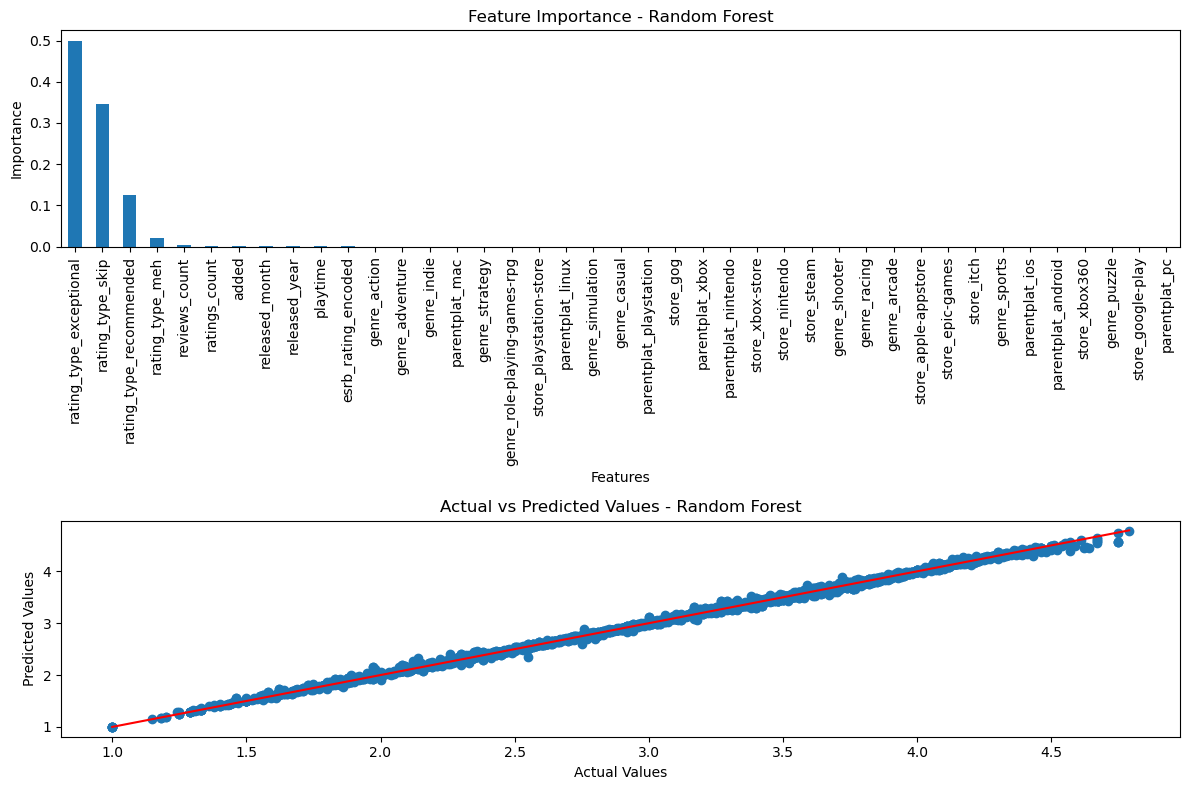

In [305]:
# BASE RANDOM FOREST - with user data
X = reduced_no_outliers_df.drop(['rating', 'name']+platforms, axis=1)
y = reduced_no_outliers_df['rating']
random_forest(X,y)

MSE: 0.15953905494307818
MAE: 0.26859912505892086
R^2: 0.7252692007647727
Leaving user rating_types: 
    MSE: 0.0007554596018229753 
    MAE: 0.015658335332214068 
    R^2: 0.9986990770361978


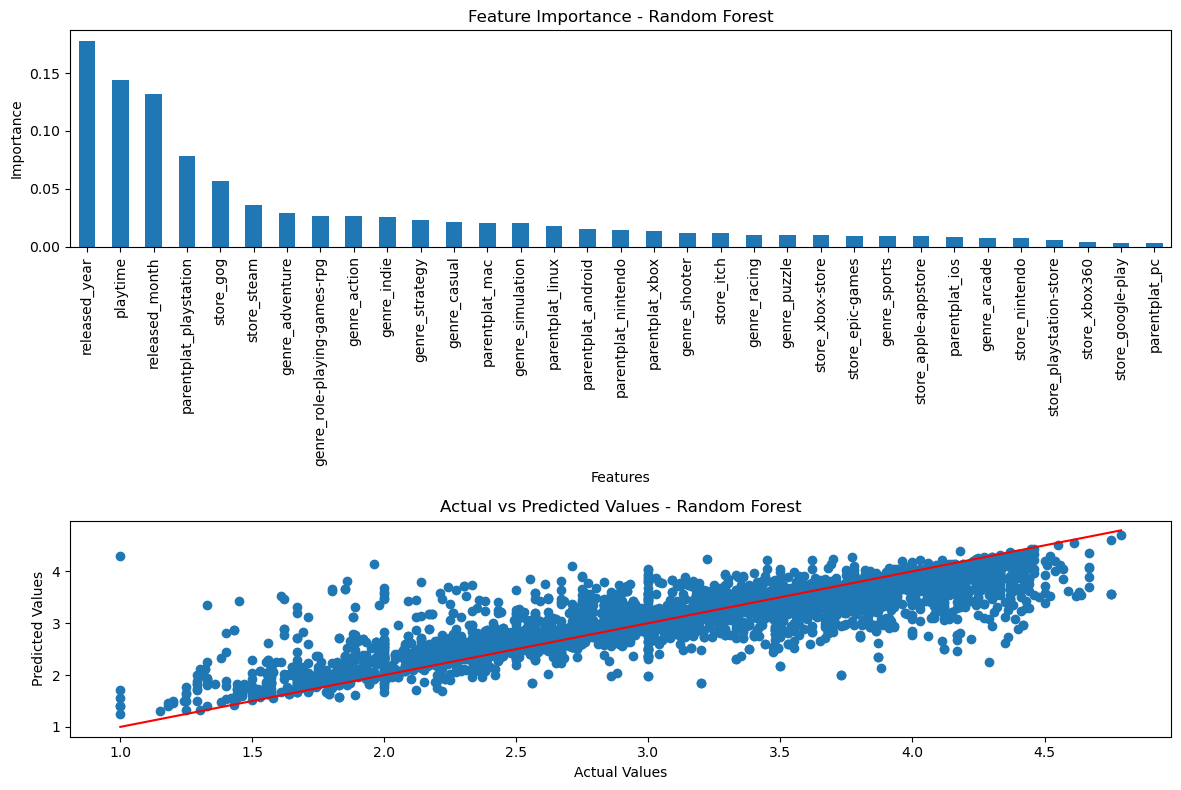

In [303]:
# RAndom Forest - no player data
X = reduced_no_outliers_df.drop(['rating', 'name']+platforms+player_data, axis=1)
y = reduced_no_outliers_df['rating']
random_forest(X,y, compare=True)


<div style="background-color:#ddac32; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>OBSERVATIONS</b>
</div>
  THe first model of Random Forest used player data,
   the new metrics might suggest that the previous model was overfitted, as the current model's performance metrics are more in line with what we might expect from a well-fitted model. In the previous model, the near-perfect R^2 value might have suggested overfitting.
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>

your model might indeed struggle to make accurate predictions if it has been trained with these features. This is a common challenge in predictive modeling known as the "cold start" problem, where the model has to make predictions for items without historical data.

One solution could be to create separate models: one that works for games with player data (post-launch) and another for games without player data (pre-launch). The pre-launch model could use only features that are available prior to launch, such as genre, developer, platform, price, and so on. The post-launch model could incorporate all these features plus the player-specific ones.

Alternatively, you might be able to use more sophisticated techniques like transfer learning (using the knowledge gained from modeling games with player data to help model games without player data) or active learning (iteratively updating the model with data from new games as it becomes available).


<div style="background-color:#ddac32; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Grid Search</b>
</div>
  Try to improve the model without player-data with a grid search

### 
<div style="background-color:#FFDB58; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>XGBOOST</b>
</div>

<div style="background-color:#ddac32; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>Selecting columns and splitting in TRAIN TEST</b>
</div>
  
  
  
<div style="background-color:#55FFaa; padding:10px; font-size:20px; color:black; text-align:center; margin-bottom:20px;">
    <b>CHATGPT:</b>
</div>



In [316]:
# Importing necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = reduced_no_outliers_df.drop(['rating', 'name']+platforms, axis=1)
y = reduced_no_outliers_df['rating']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')
print(f'Train R^2: {r2_train}')
print(f'Test R^2: {r2_test}')


Train MSE: 0.0007195757018679264
Test MSE: 0.00098557258540565
Train MAE: 0.020116883954811354
Test MAE: 0.023152654756027666
Train R^2: 0.9987533872631732
Test R^2: 0.9983028159205943


#  
#  
# SVM maybe?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = reduced_df.drop(['rating', 'name', 'added','id'], axis=1)
y = reduced_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train MSE: {mse_train}, Train MAE: {mae_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test MAE: {mae_test}, Test R^2: {r2_test}')


In [ ]:
print("status?")